In [1]:
from matplotlib import pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from bids import BIDSLayout
from statsmodels.stats.anova import AnovaRM
from util.io.ffr import *
from bids import BIDSLayout

In [80]:
def compute_power_dB(evokeds):
    poststim = evokeds.compute_psd(tmin = 0., tmax = 0.1, fmin = 100, fmax = 450)
    baseline = evokeds.compute_psd(tmin = -0.1, tmax = 0., fmin = 100, fmax = 450)
    power = 10 * np.log10(poststim.get_data() / baseline.get_data())
    power = np.squeeze(power)
    freqs = poststim.freqs
    return freqs, power

def compute_power_fft(evokeds, fs):
    x = evokeds.get_data()
    x = x.flatten()
    time_step = 1 / fs
    freqs = np.fft.fftfreq(x.size, time_step)
    idx = np.argsort(freqs)
    ps = np.abs(np.fft.fft(x))**2
    
    # Take only freqs of interest
    freqs = freqs[20:90]
    ps = ps[20:90]
    return(freqs, ps)

def balanced_average(evokeds):
    evns = [ev.nave for ev in evokeds]
    w = np.array(evns)
    w = w.sum() / (w.size * w)
    weights = w / w.sum()
    # so sum to one
    res = mne.combine_evoked(evokeds, weights = weights)
    return res

def get_power_spectrum(ev):
    from scipy.signal import periodogram as get_psd
    stim_dur = .2
    cev = ev.copy().crop(.0, stim_dur)
    ffr = np.squeeze(ev.data)
    freqs, psd = get_psd(
    ffr, ev.info['sfreq'],
    window = 'hanning',
    nfft = int(ev.info['sfreq'] * stim_dur)
    )
    return freqs, psd

def get_power_at_harmonics(ev):
    harmonic_freqs = np.arange(440, 2000, 440)
    freqs, psd = get_power_spectrum(ev)
    idxs = [np.argmin(abs(freqs - hz)) for hz in harmonic_freqs]
    harmpow = psd[np.array(idxs)]
    return harmpow

## Averaging between polarities

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-2/sub-2_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8270 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy f

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


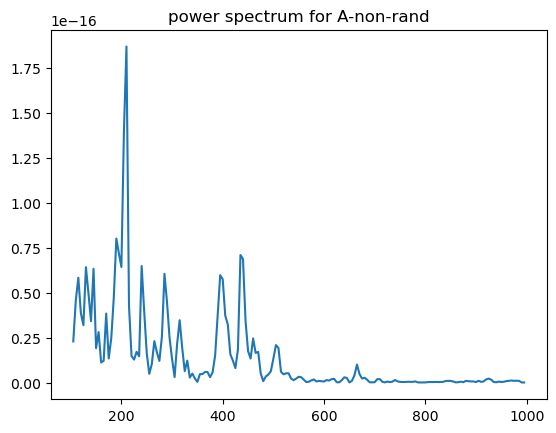

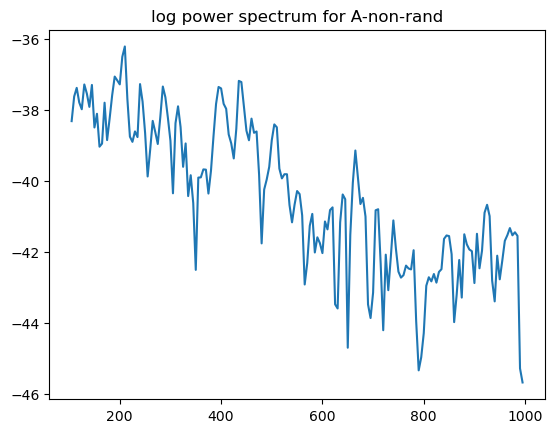

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


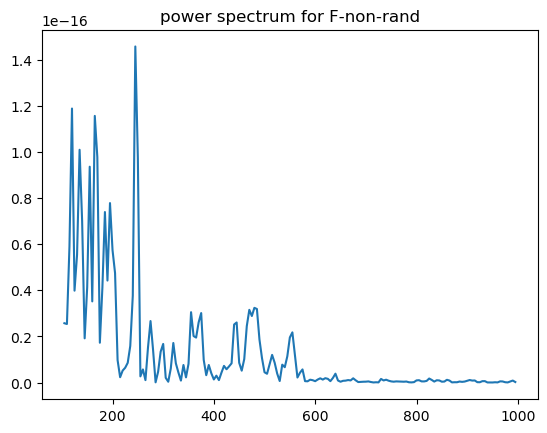

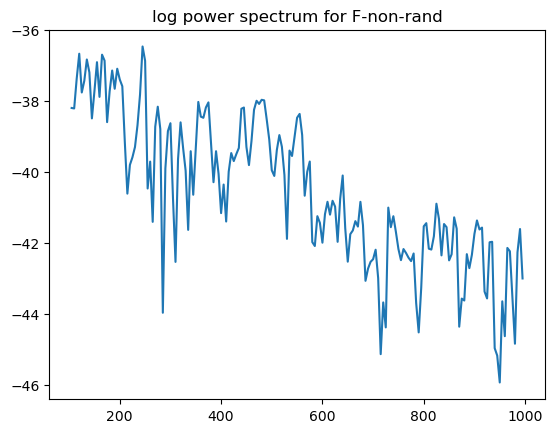

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


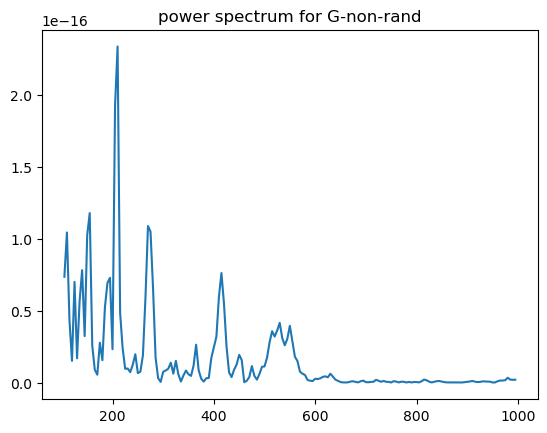

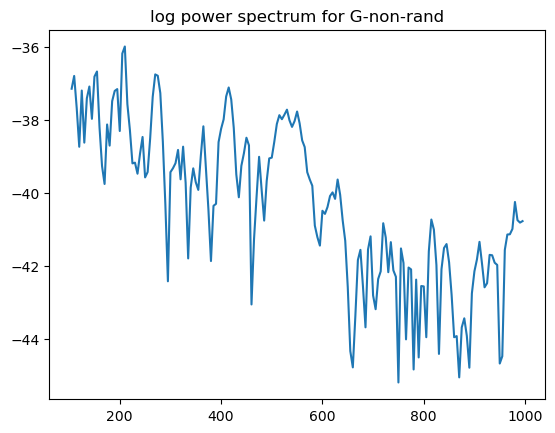

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


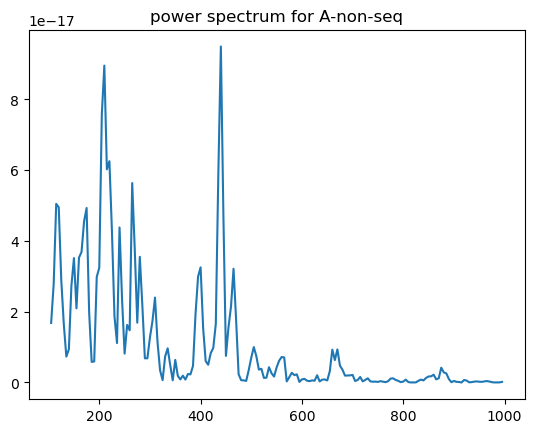

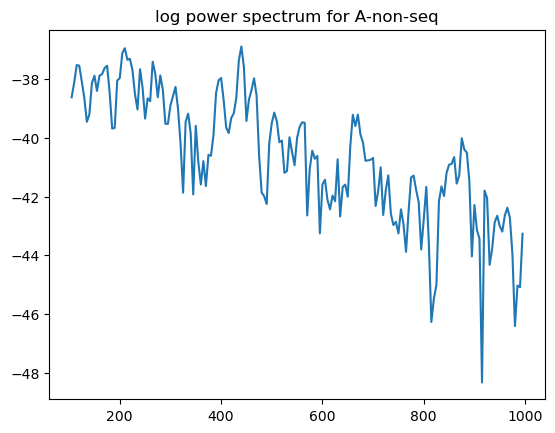

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


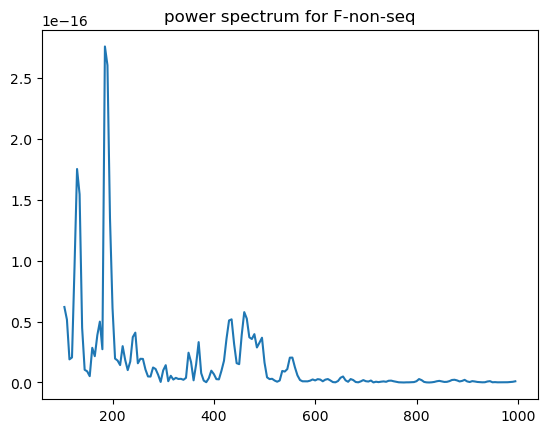

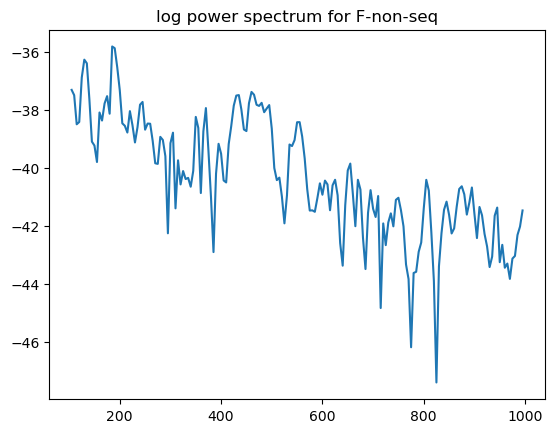

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


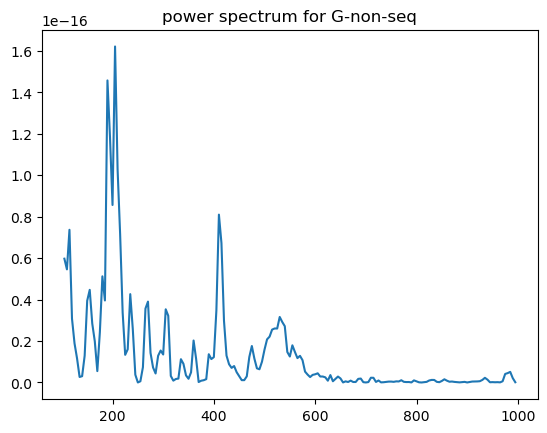

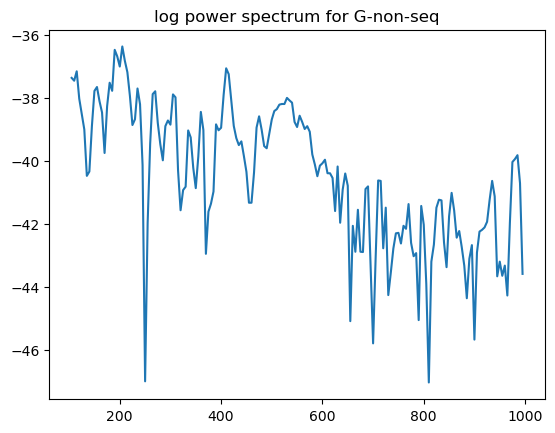

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-4/sub-4_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8682 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


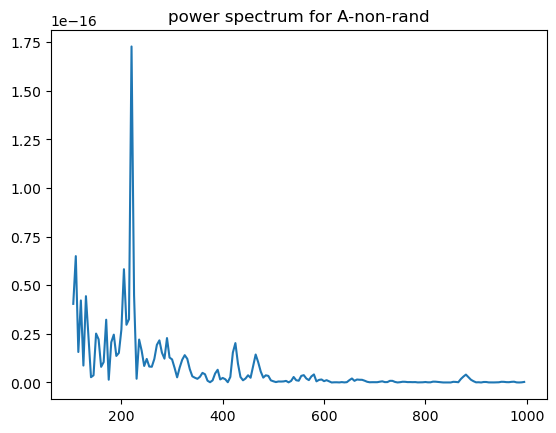

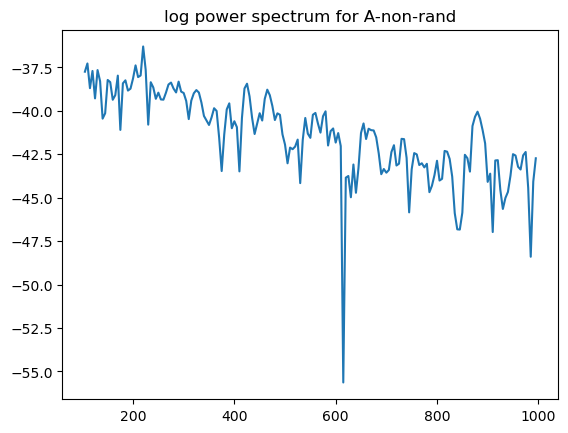

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


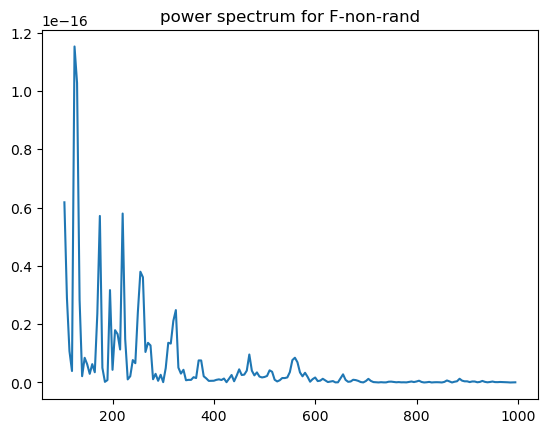

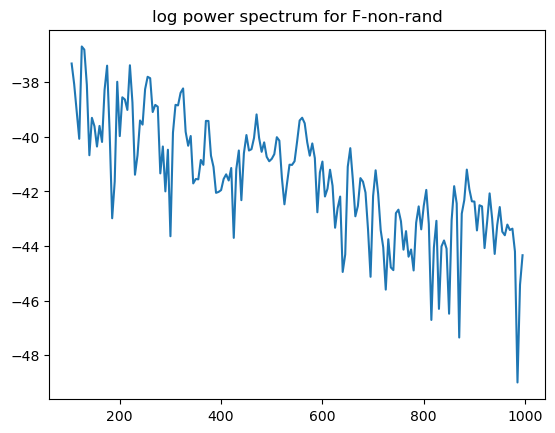

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


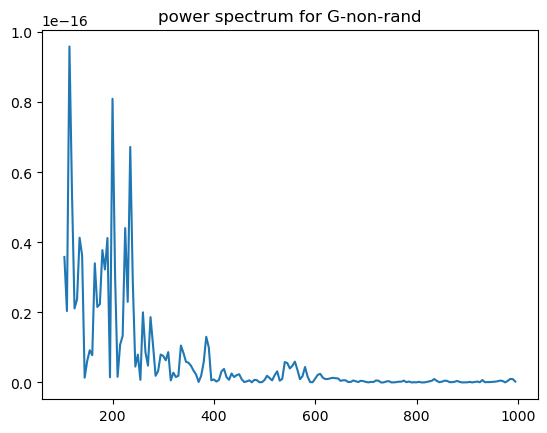

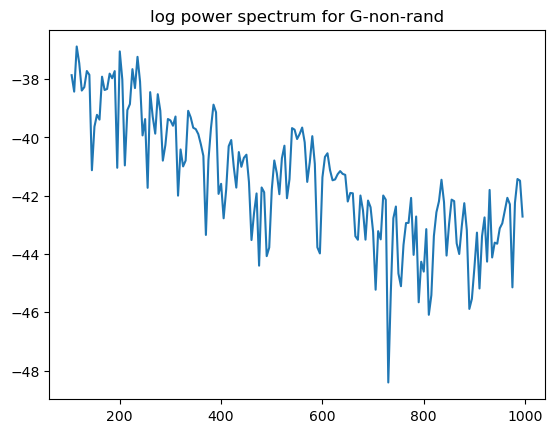

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


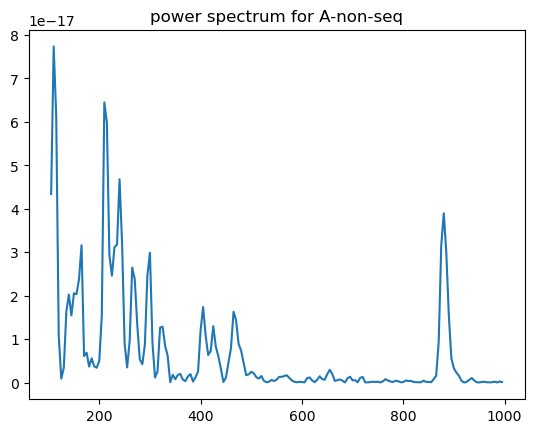

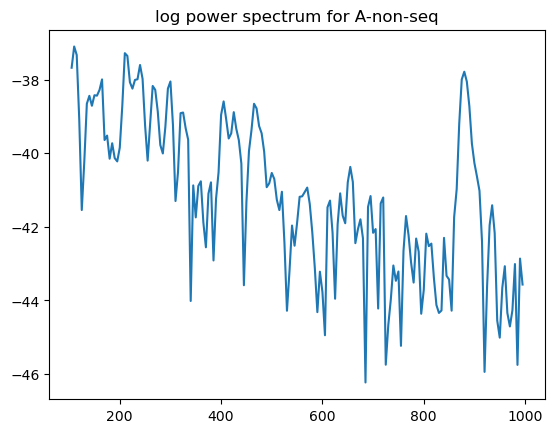

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


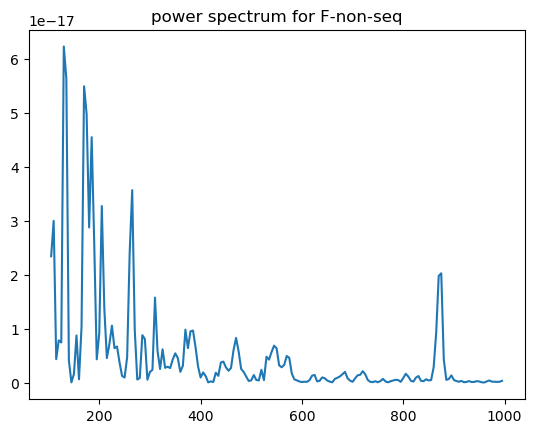

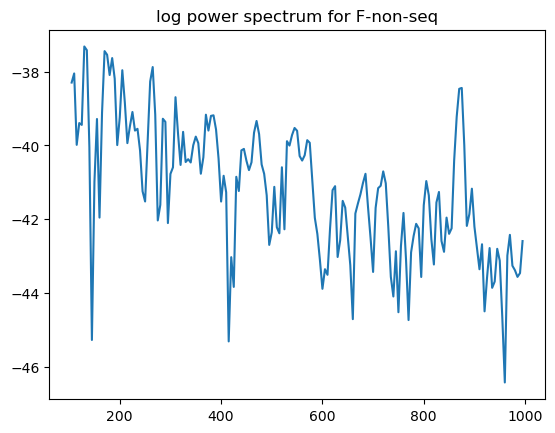

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


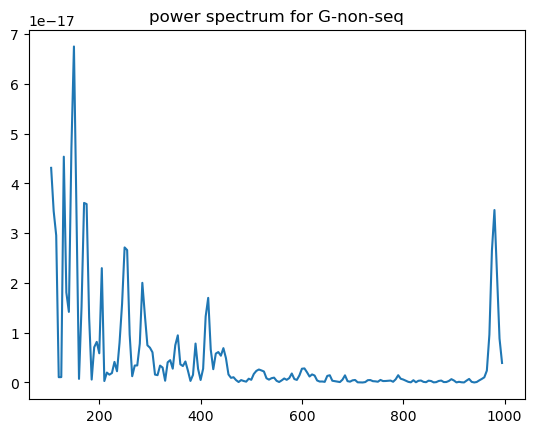

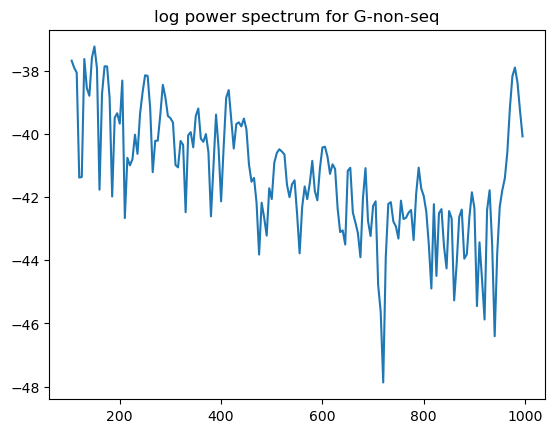

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-5/sub-5_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8650 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


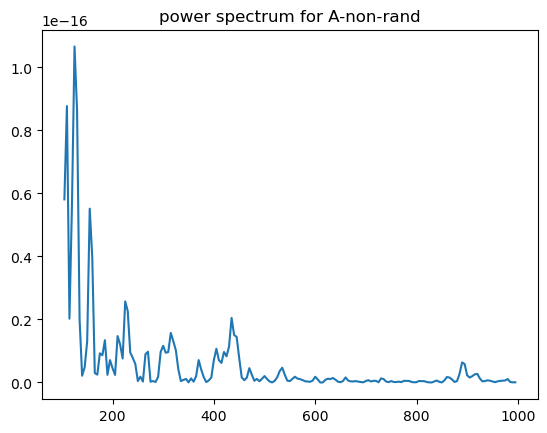

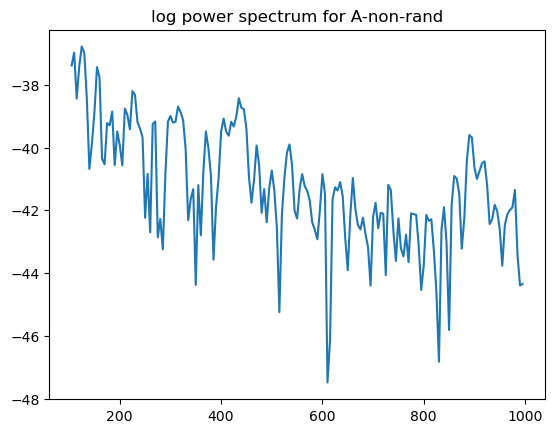

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


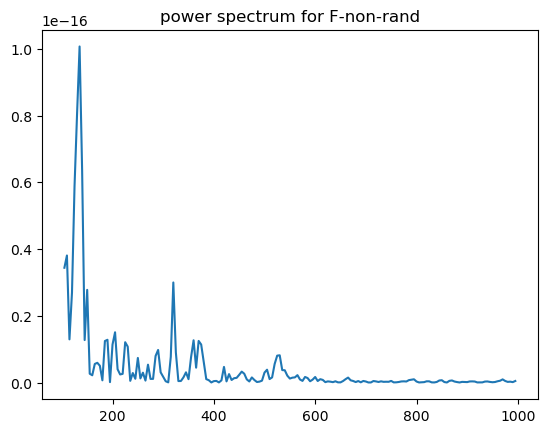

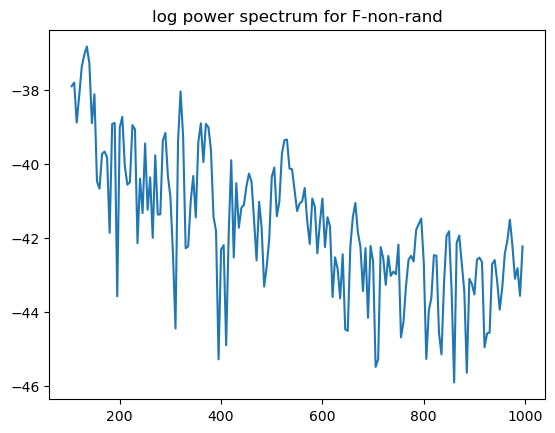

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


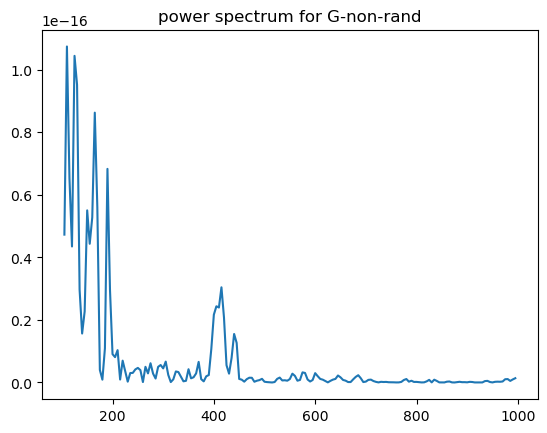

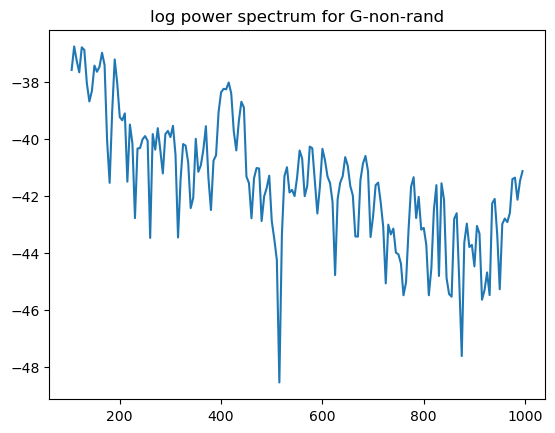

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


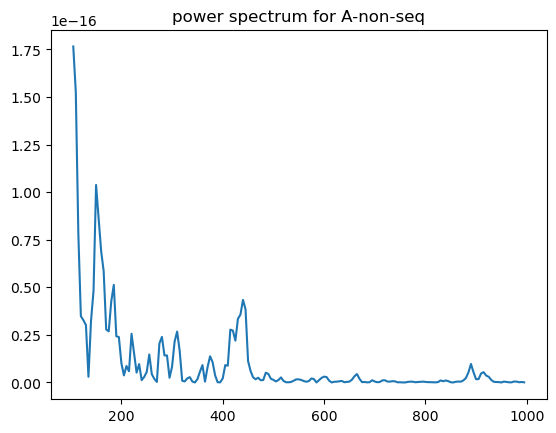

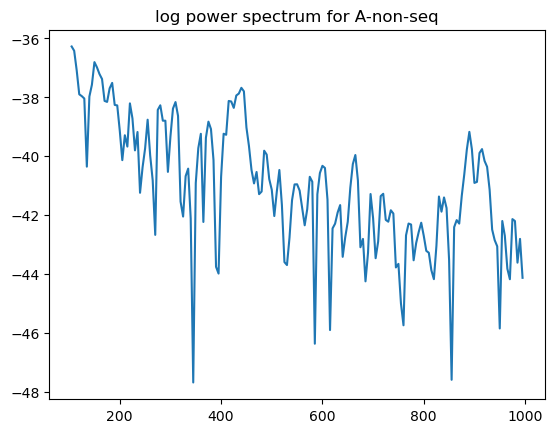

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


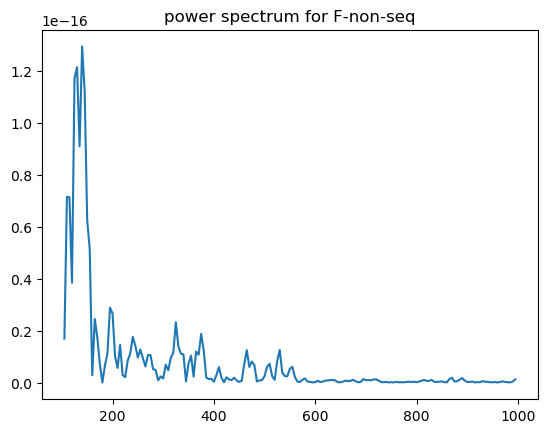

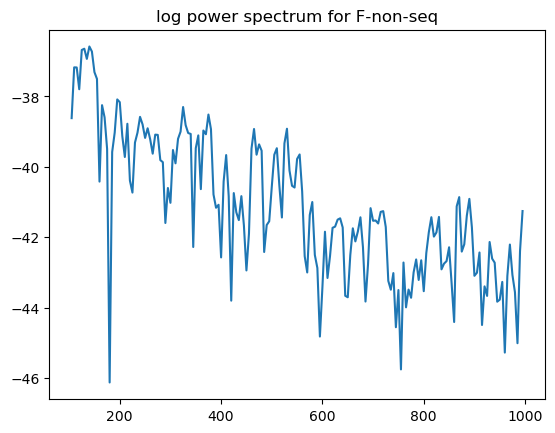

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


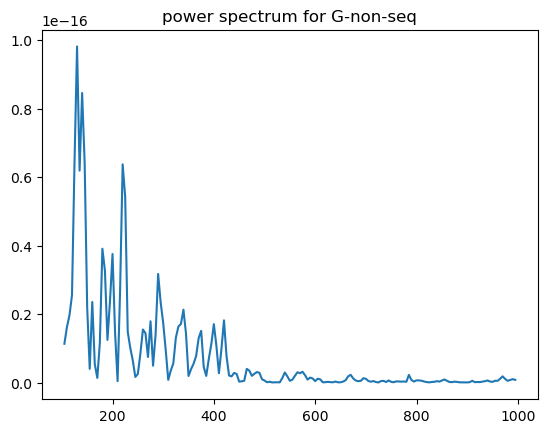

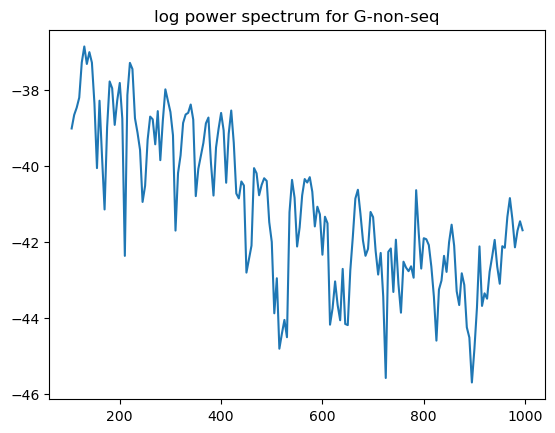

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-6/sub-6_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
1758 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


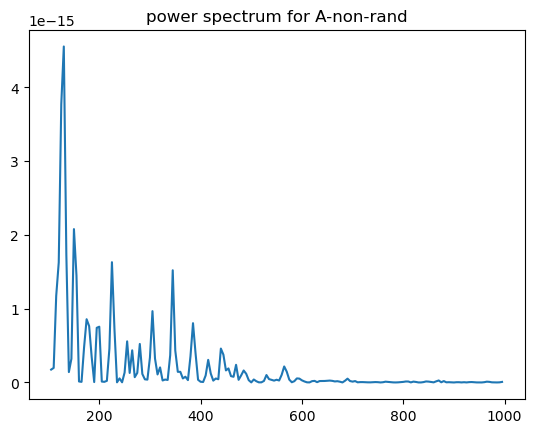

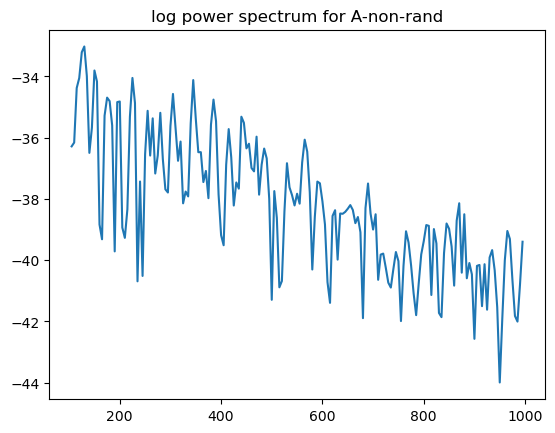

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


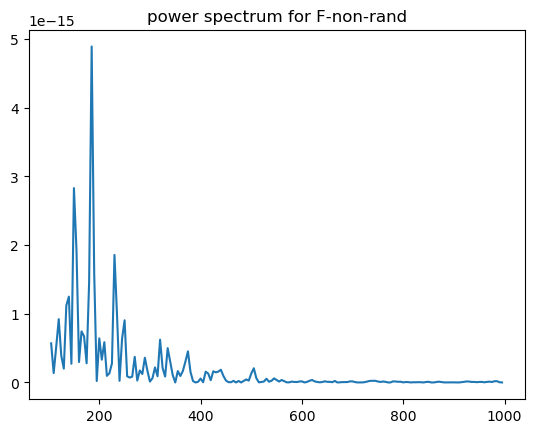

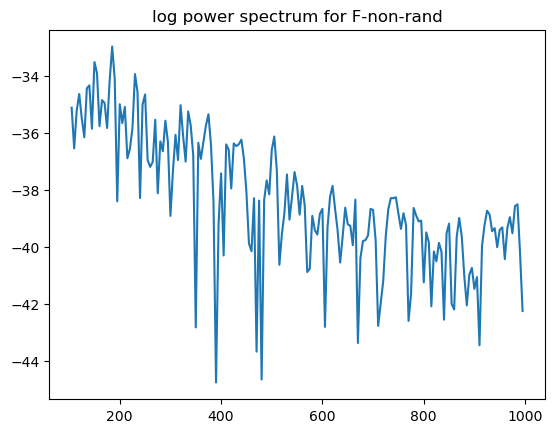

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


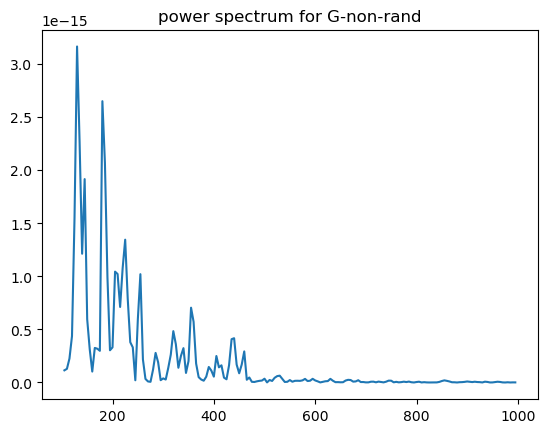

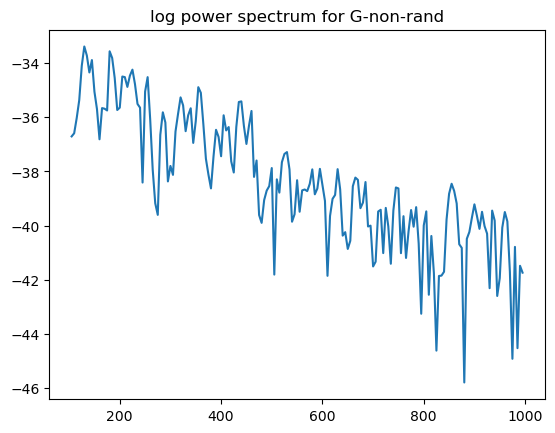

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


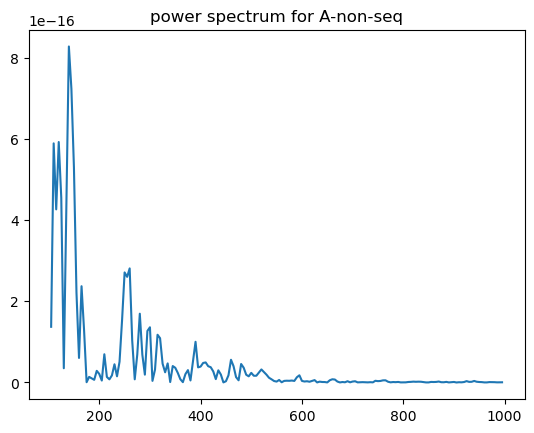

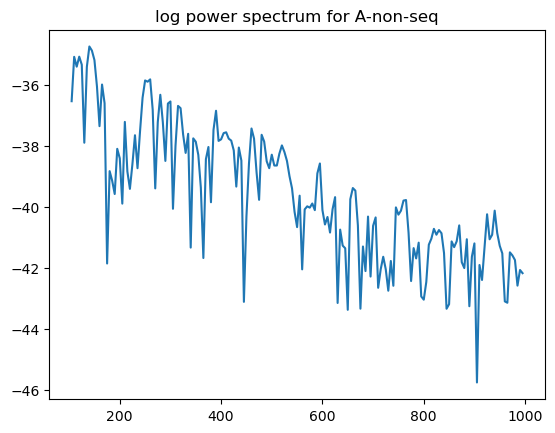

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


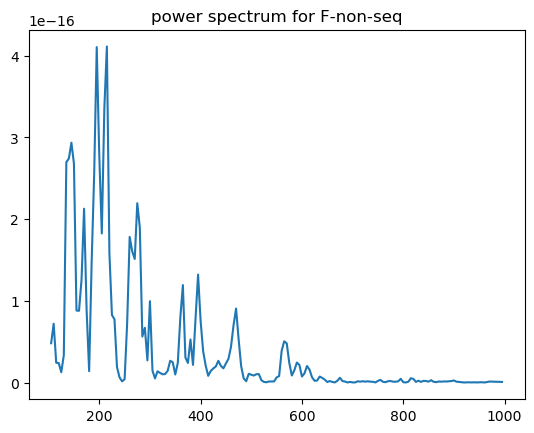

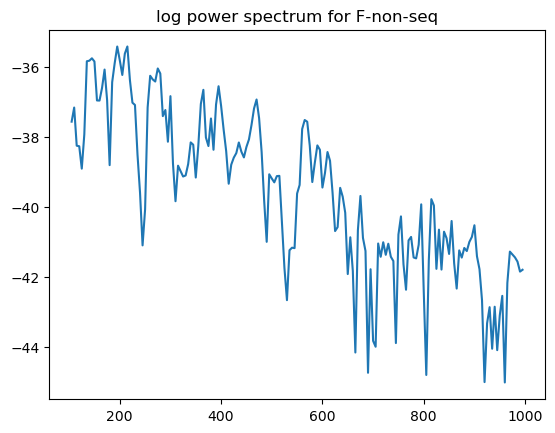

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


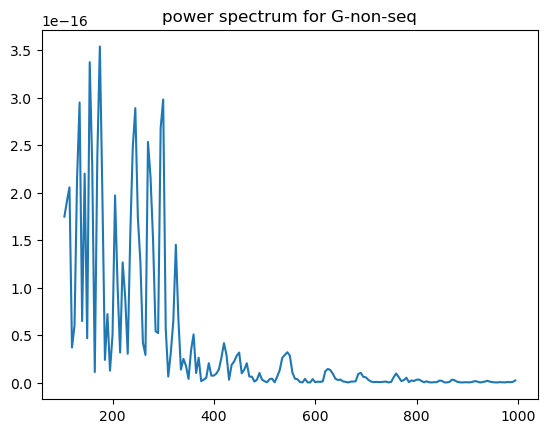

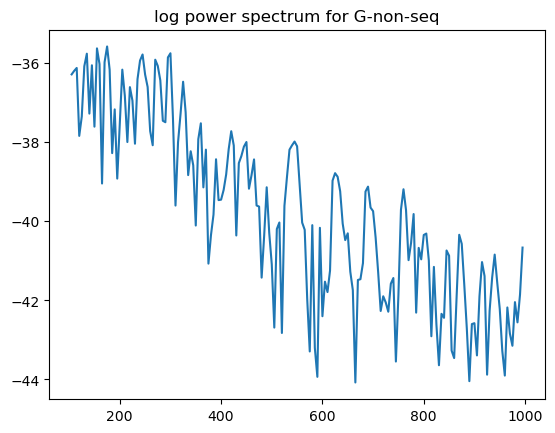

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-7/sub-7_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8380 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


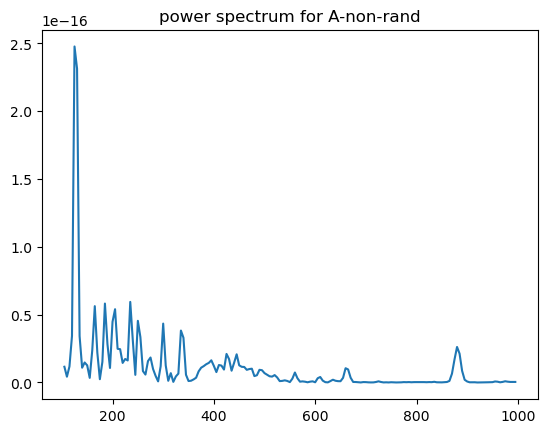

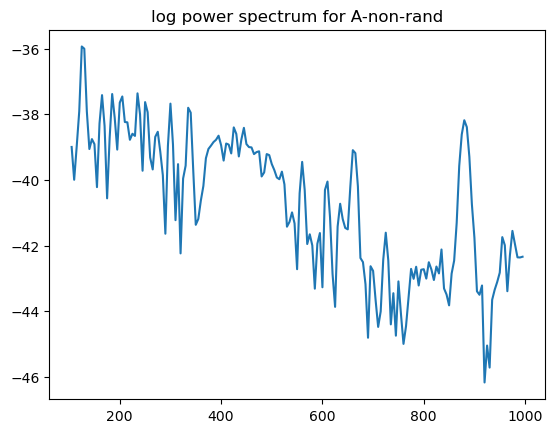

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


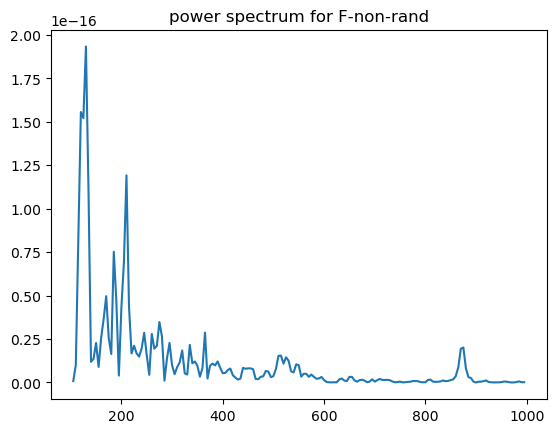

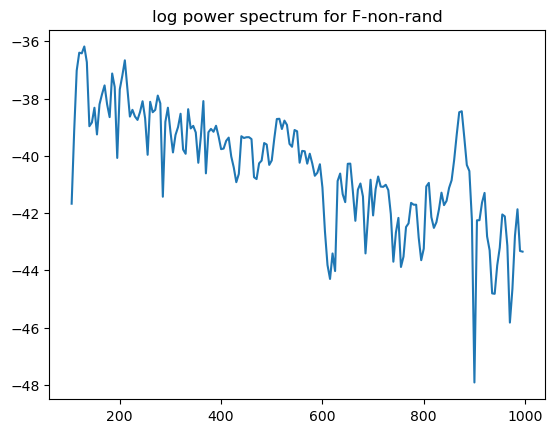

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


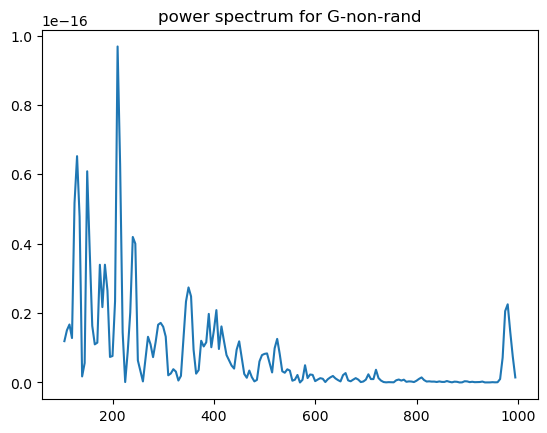

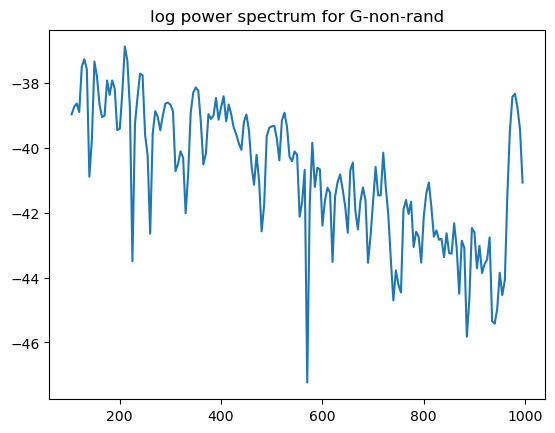

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


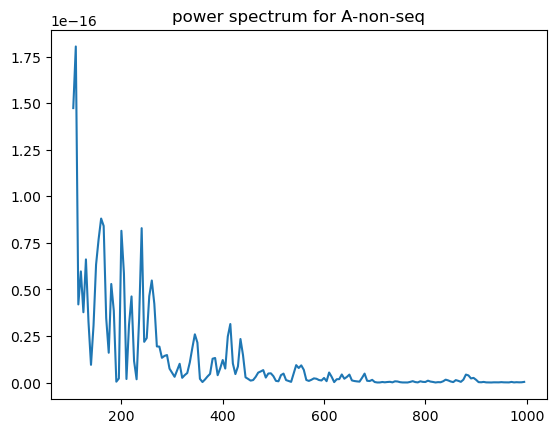

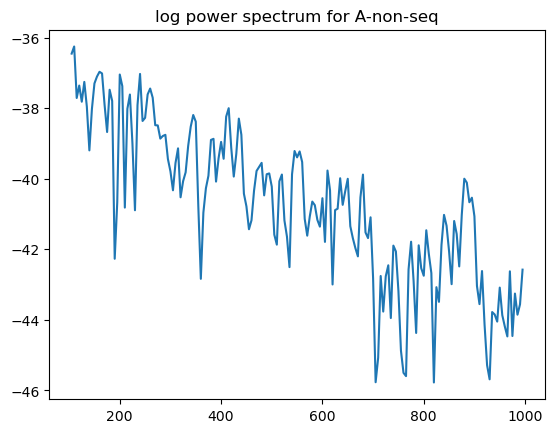

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


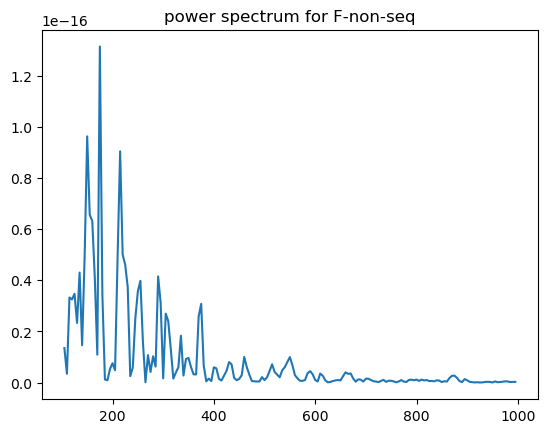

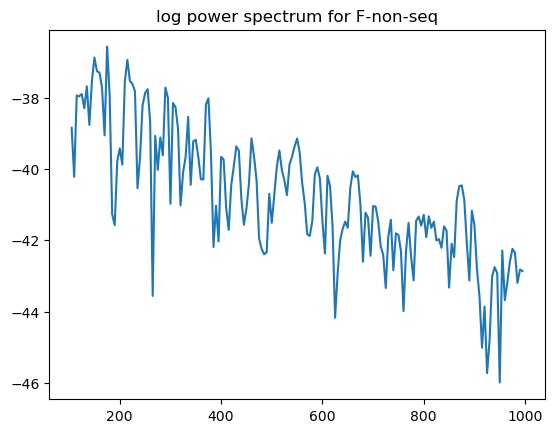

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


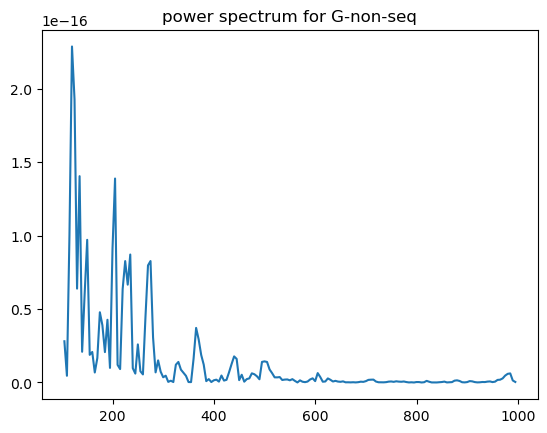

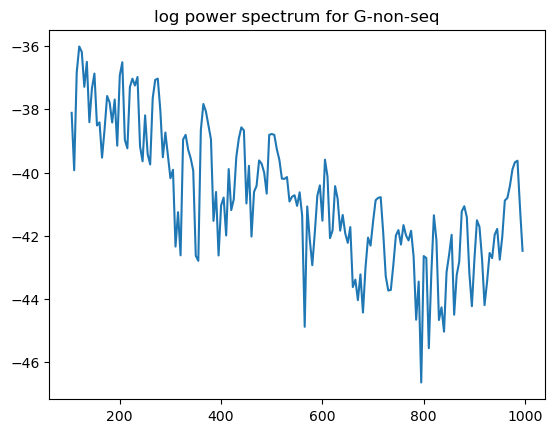

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-8/sub-8_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
7818 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


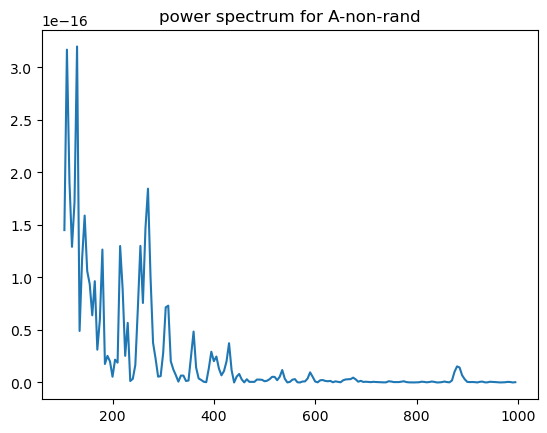

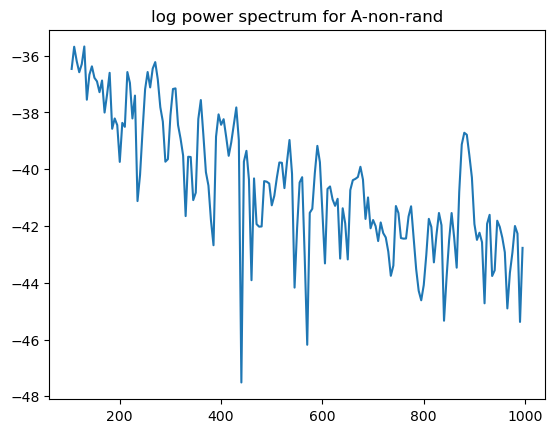

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


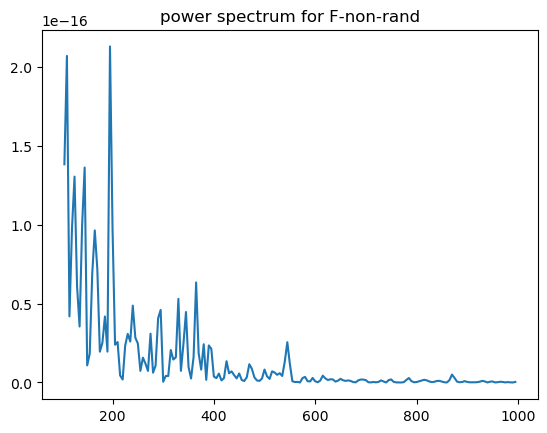

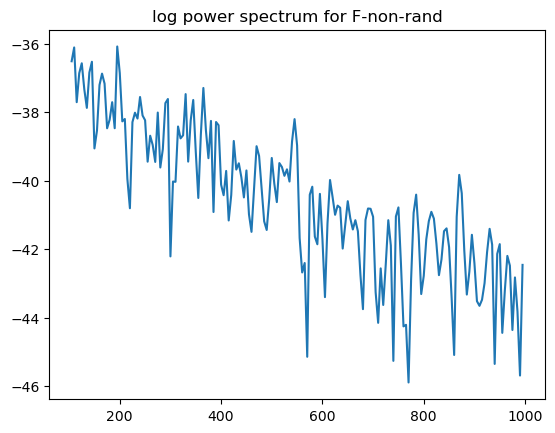

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


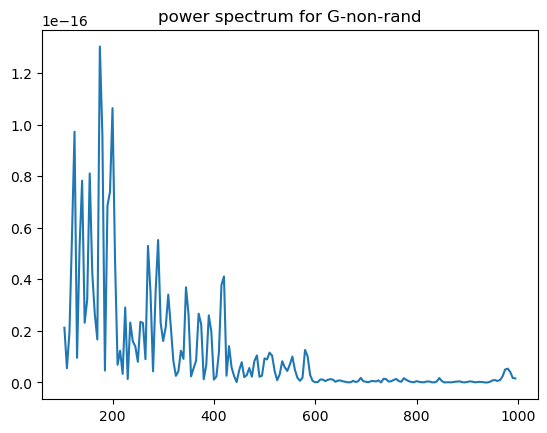

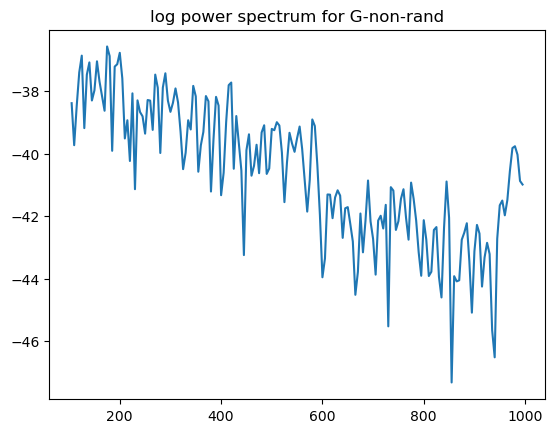

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


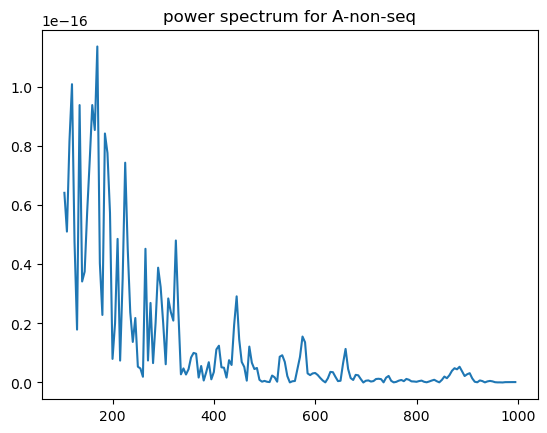

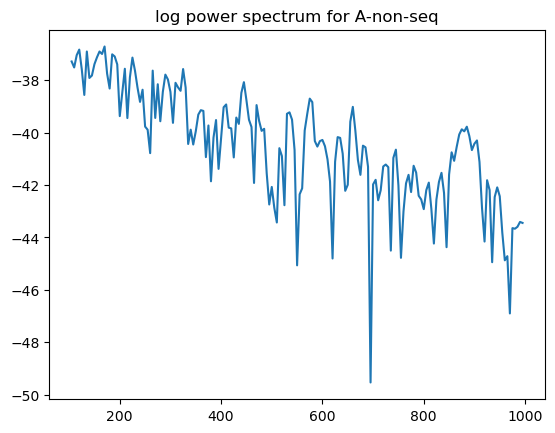

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


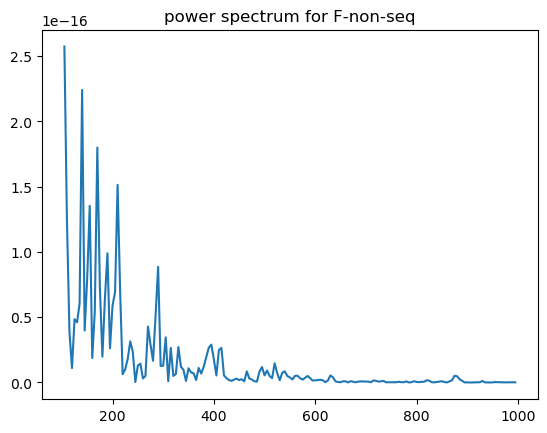

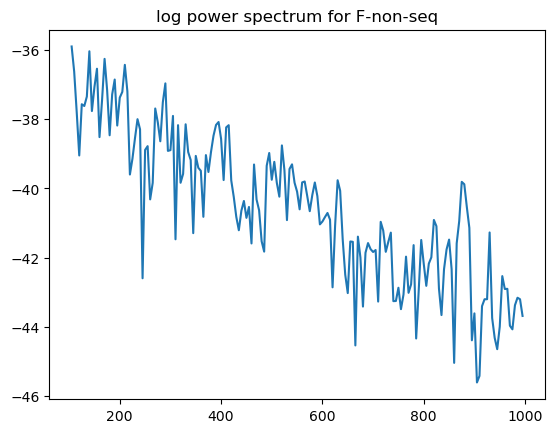

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


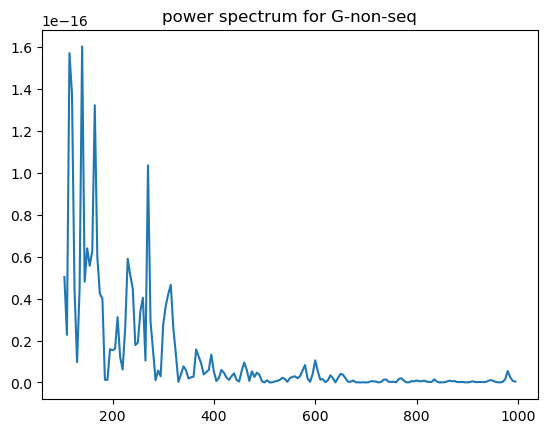

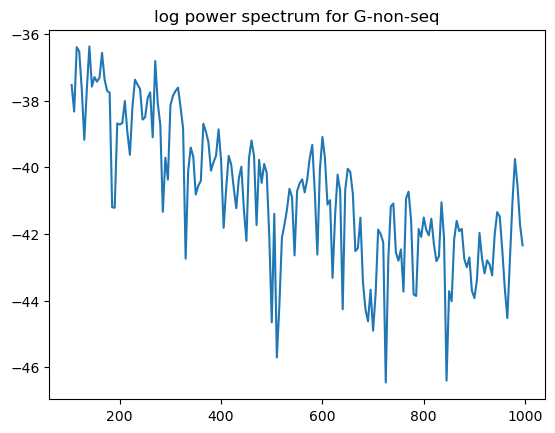

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-9/sub-9_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8654 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


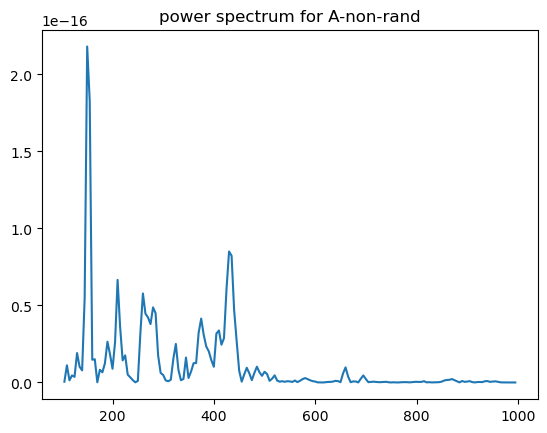

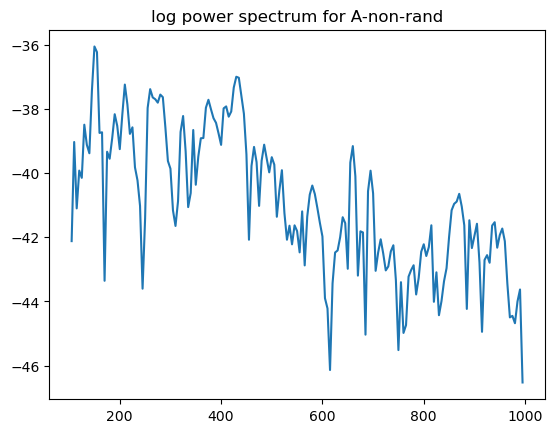

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


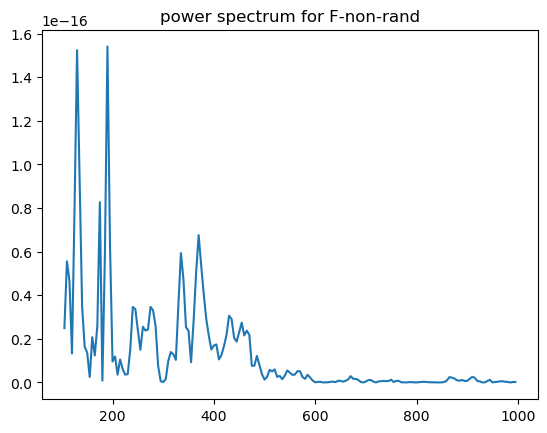

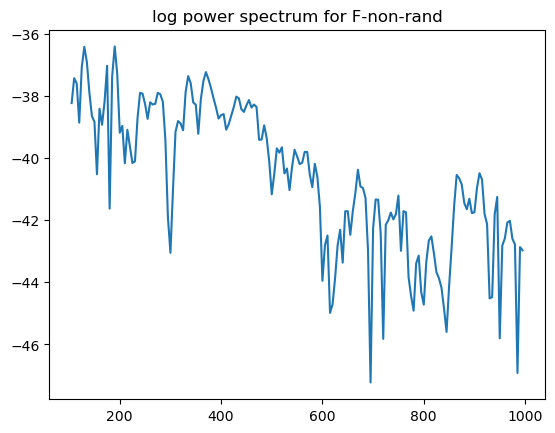

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


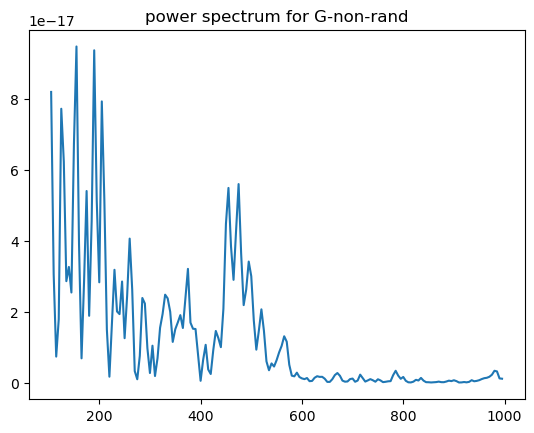

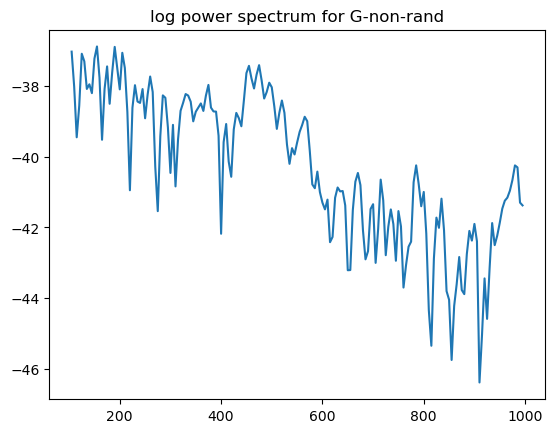

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


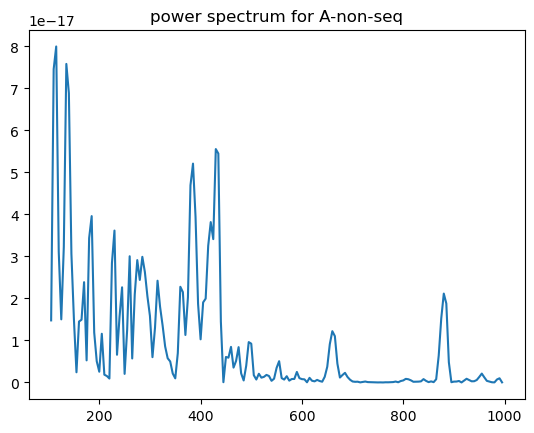

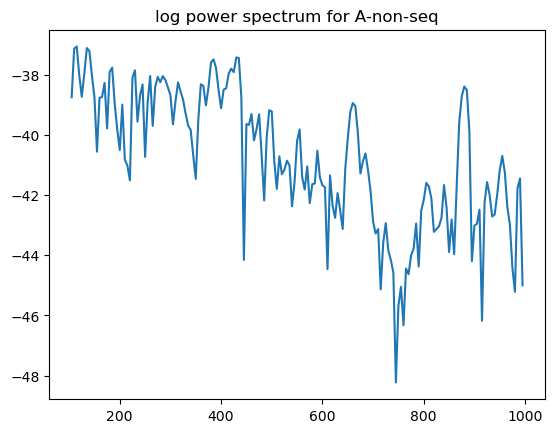

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


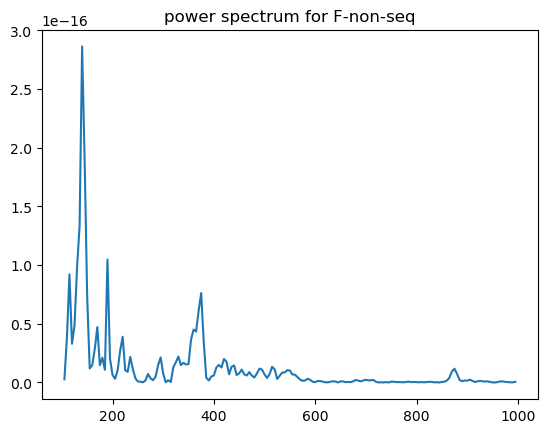

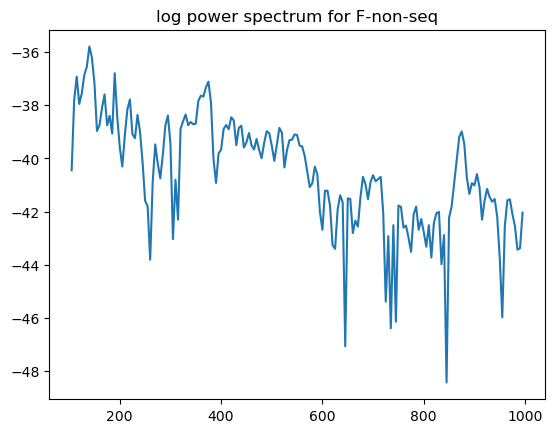

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


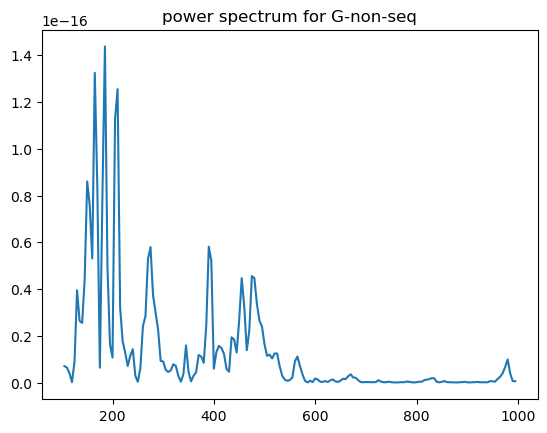

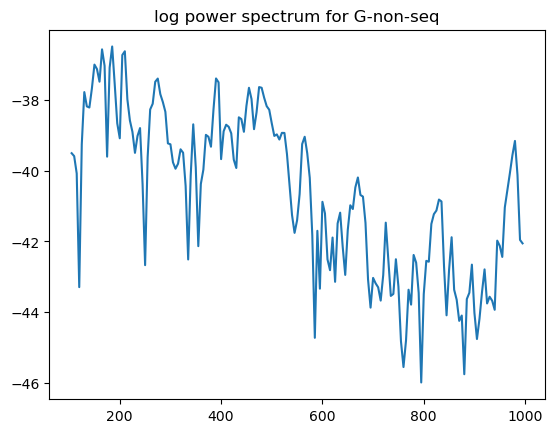

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-10/sub-10_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8574 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


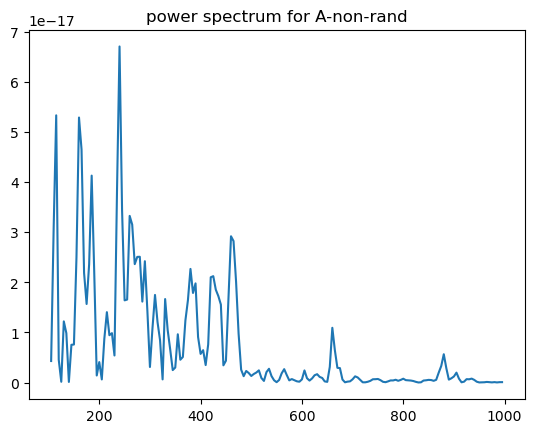

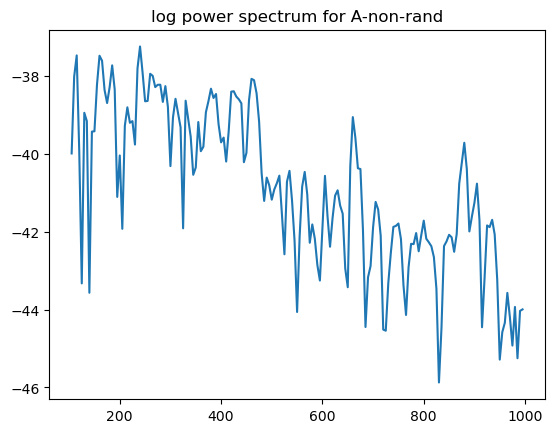

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


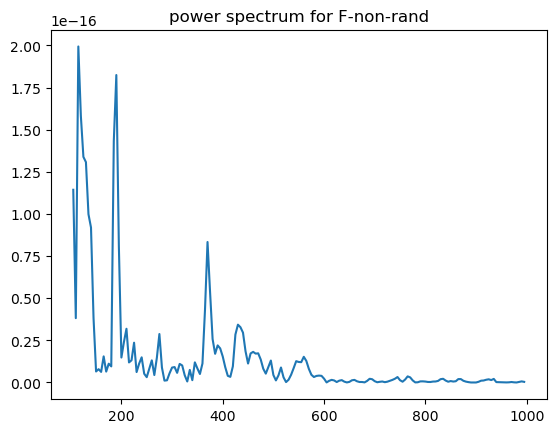

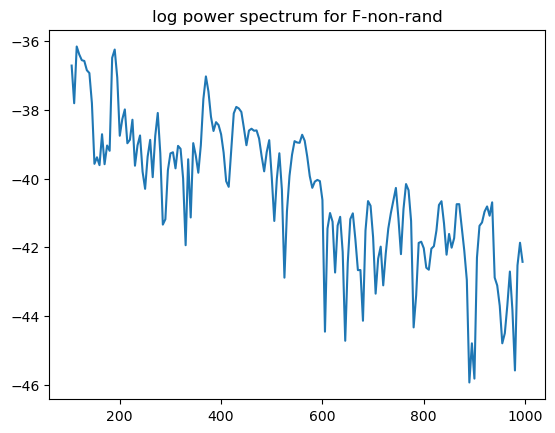

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


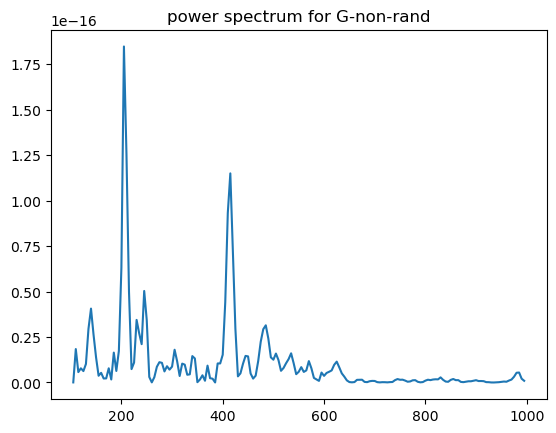

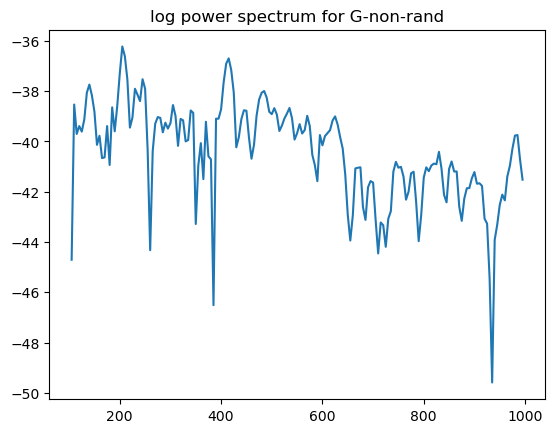

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


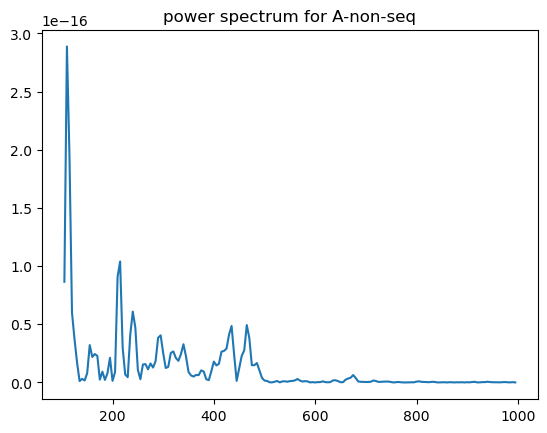

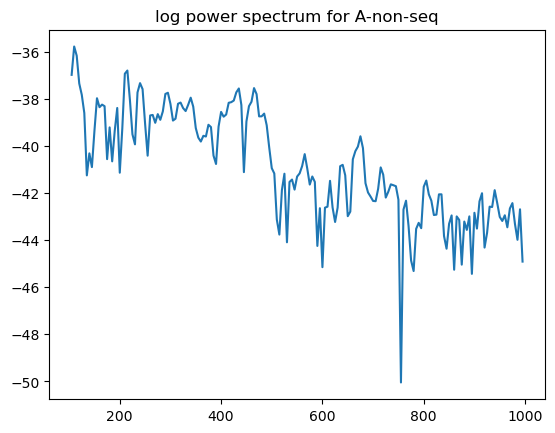

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


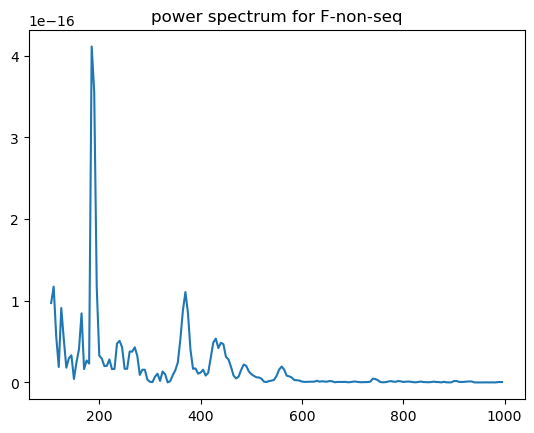

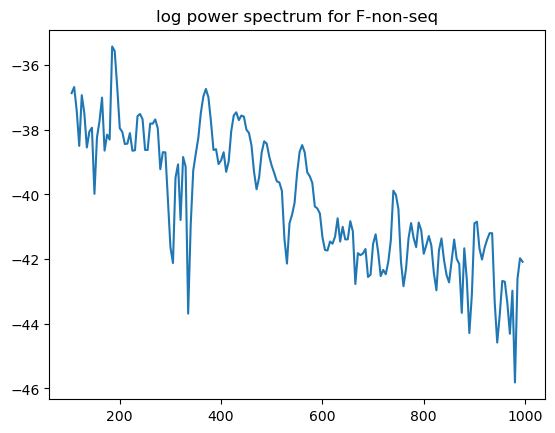

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


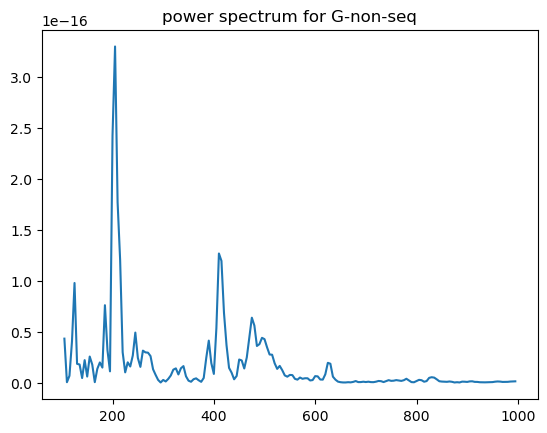

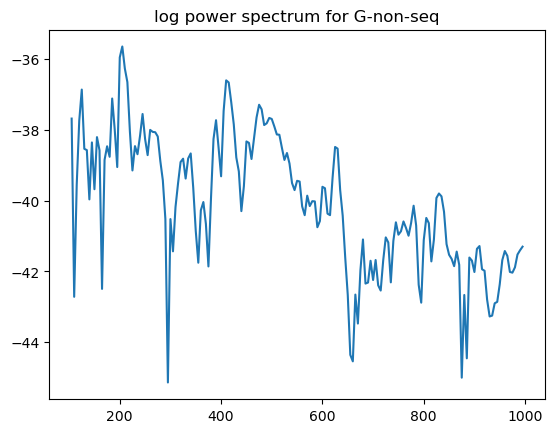

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-11/sub-11_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8637 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


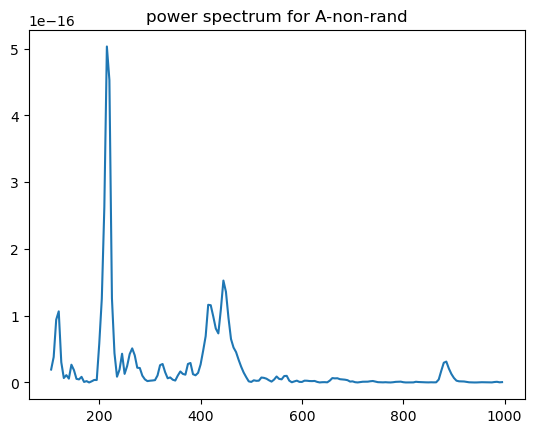

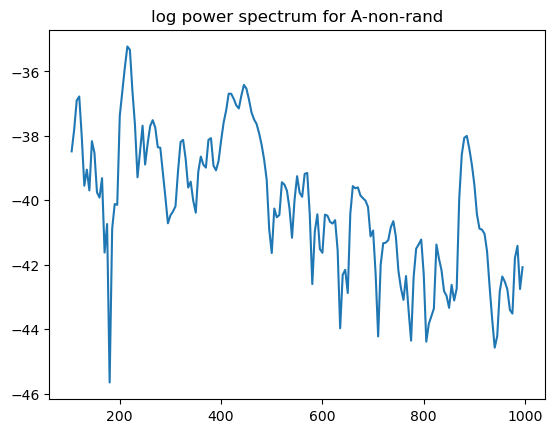

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


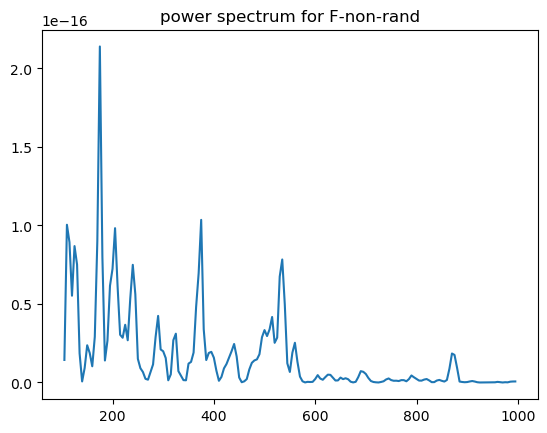

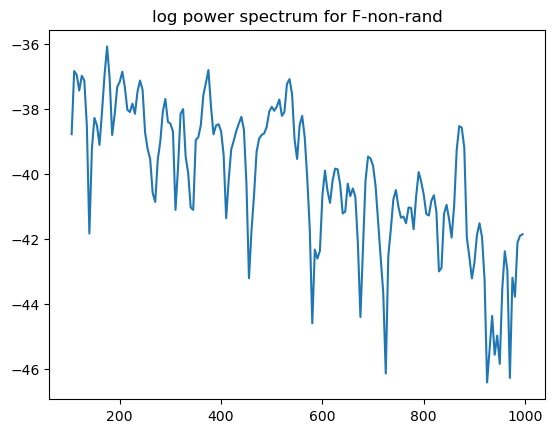

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


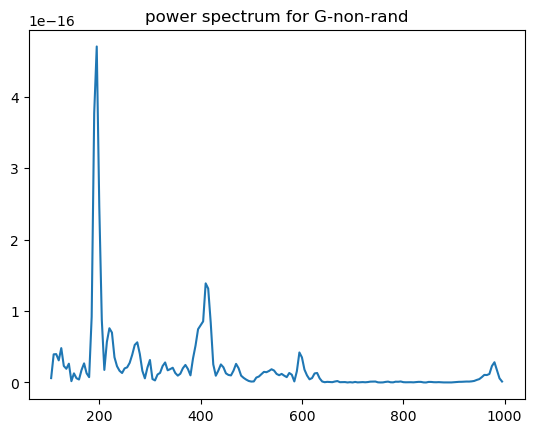

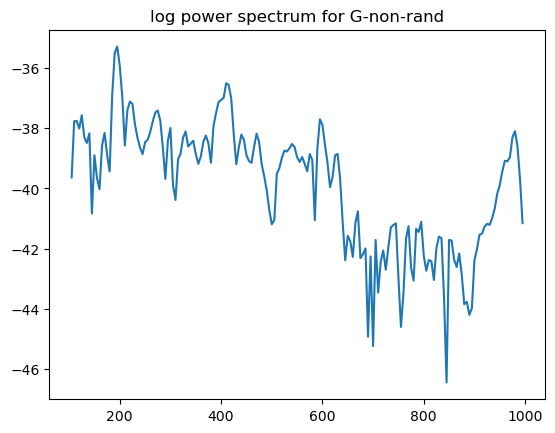

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


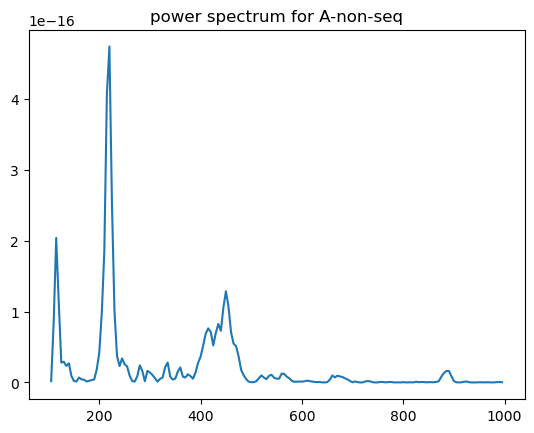

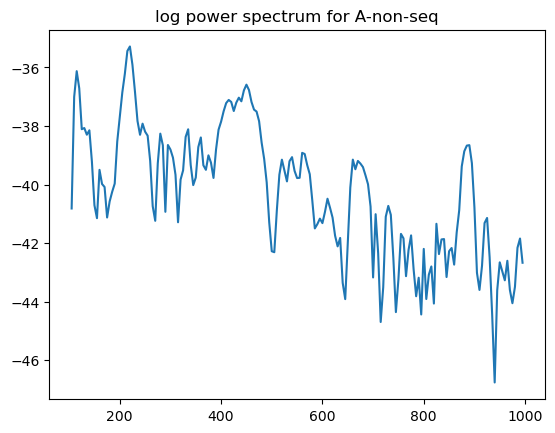

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


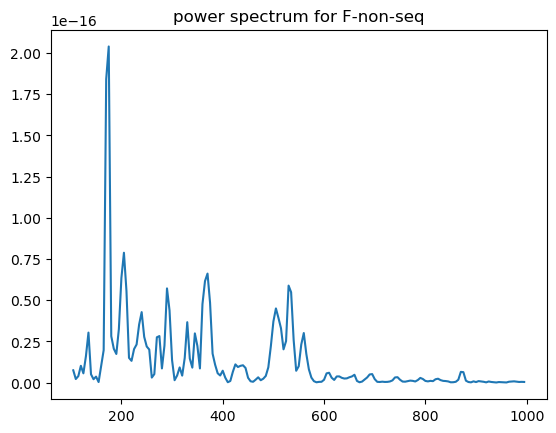

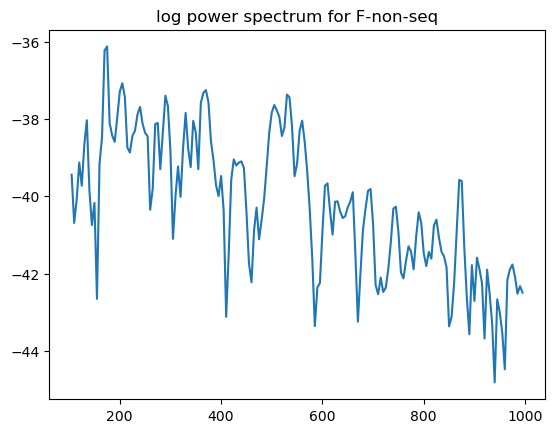

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


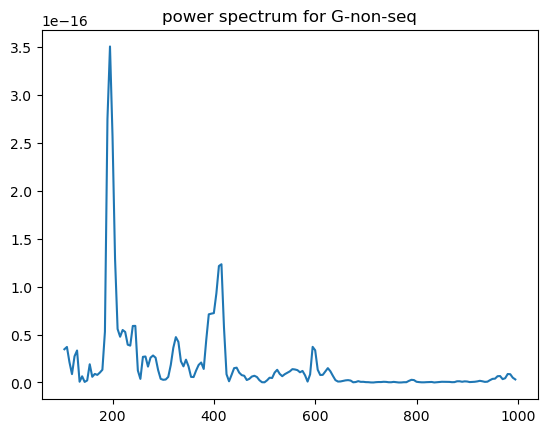

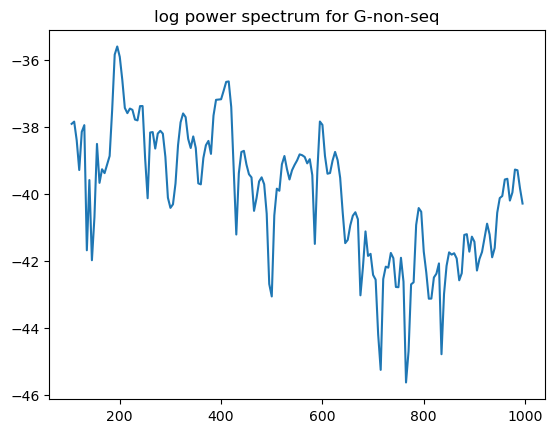

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-12/sub-12_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8712 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


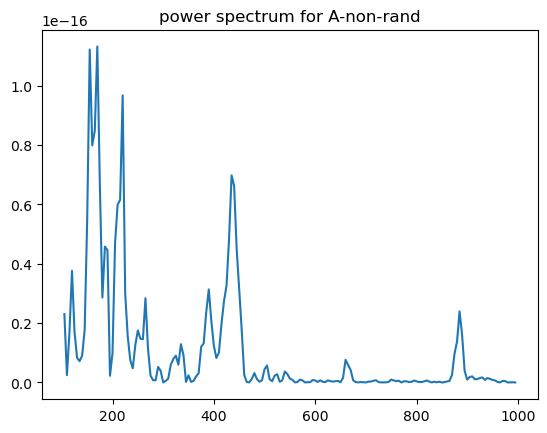

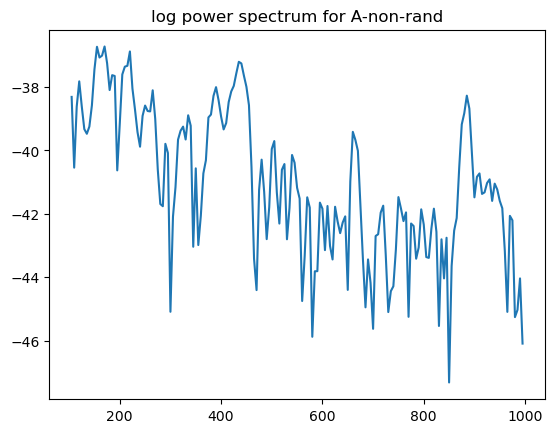

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


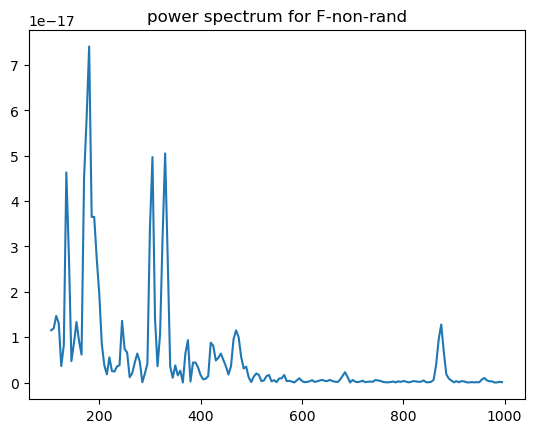

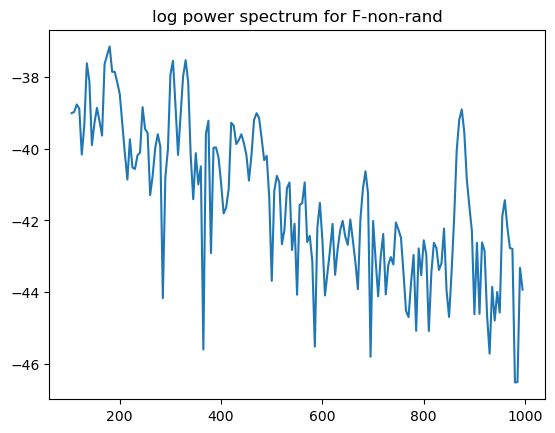

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


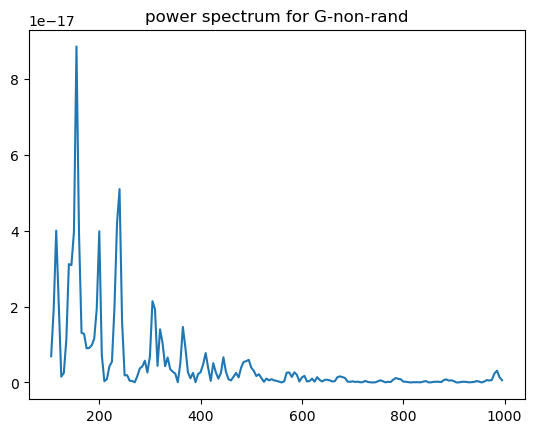

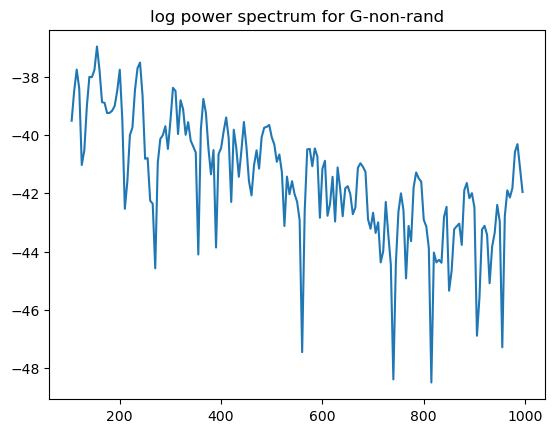

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


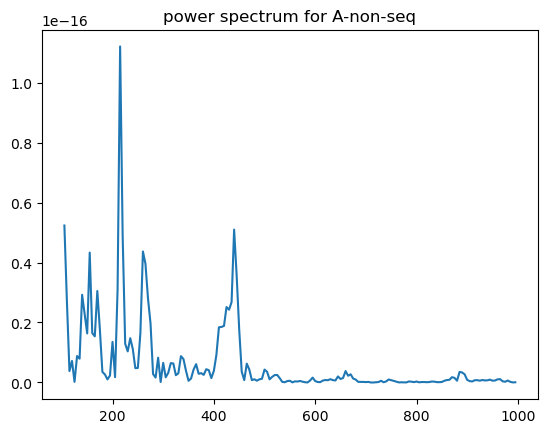

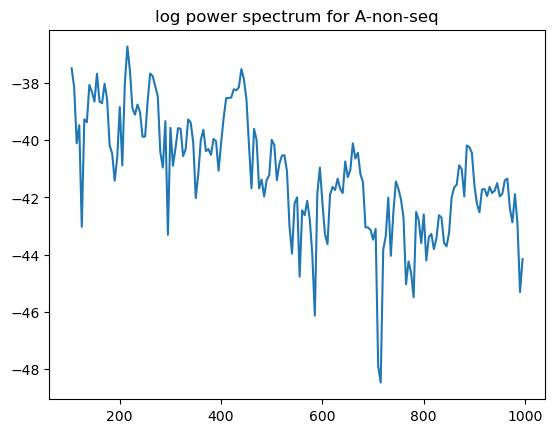

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


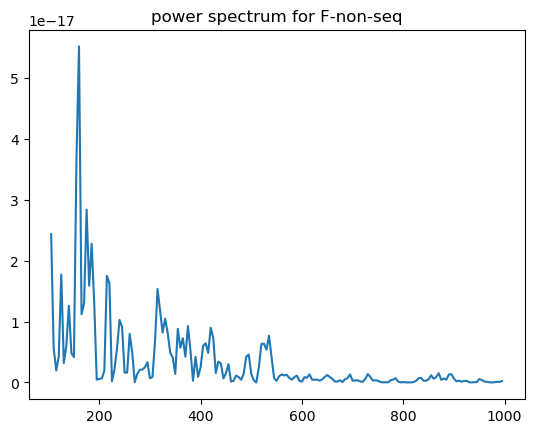

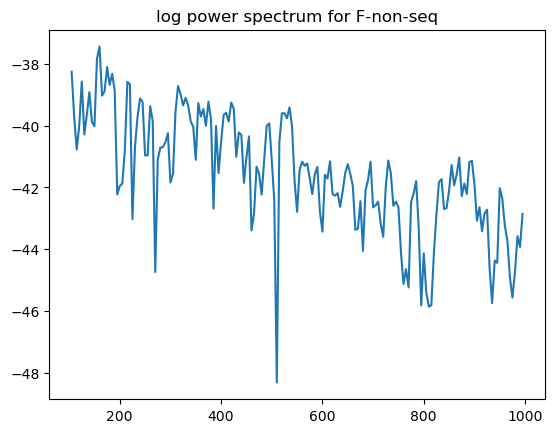

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


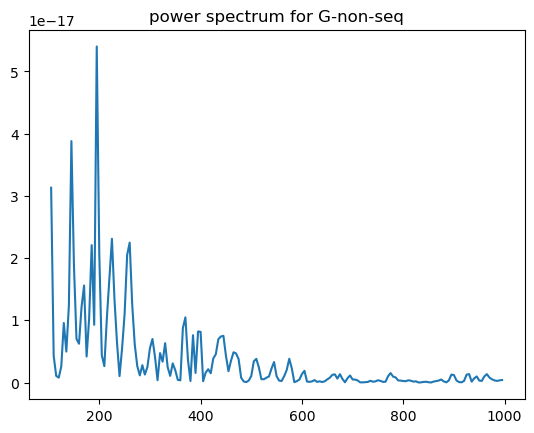

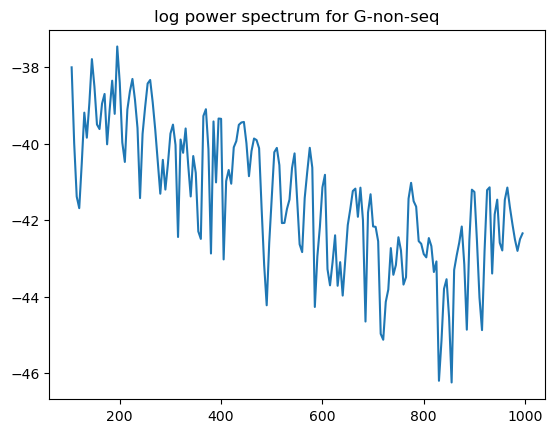

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-13/sub-13_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8686 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


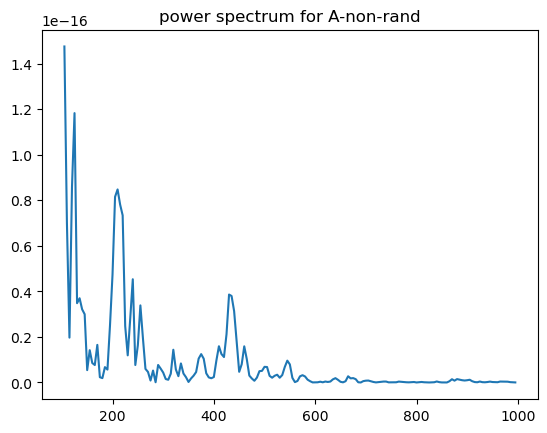

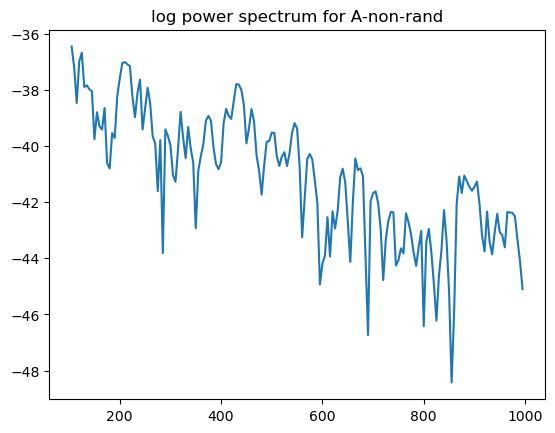

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


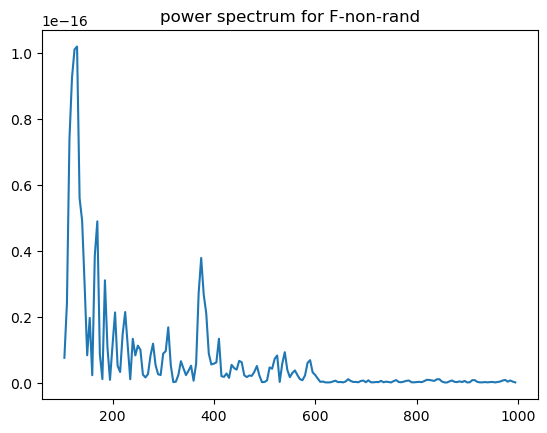

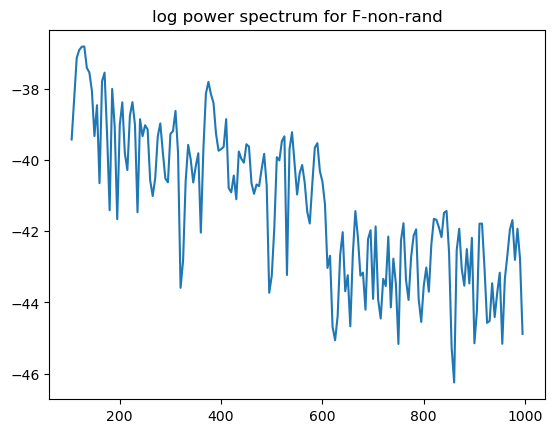

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


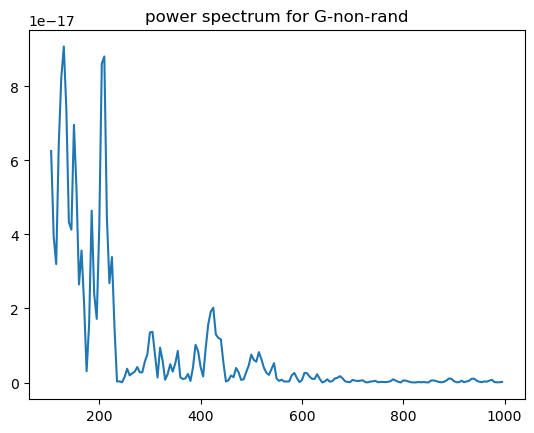

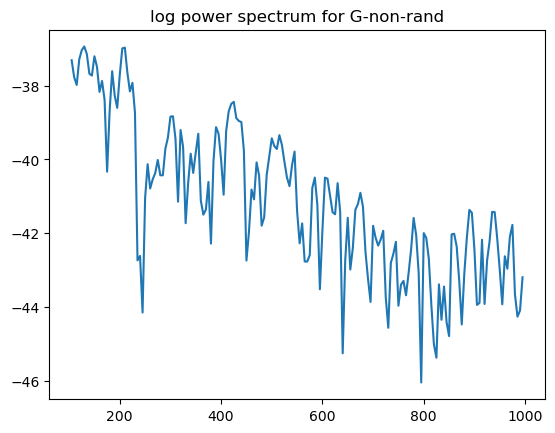

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


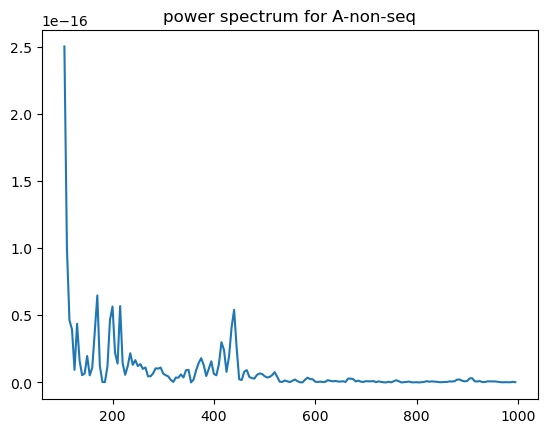

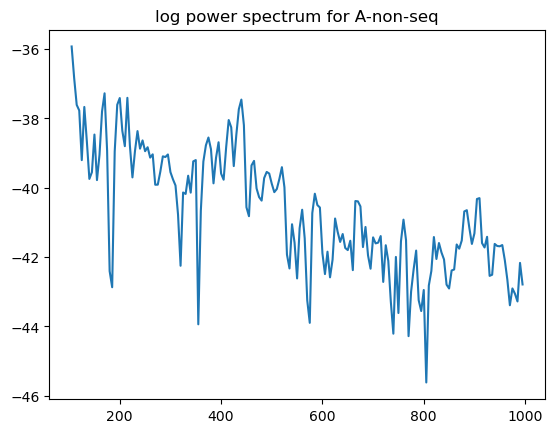

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


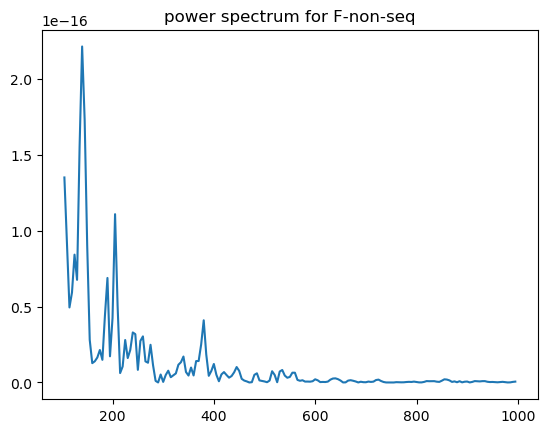

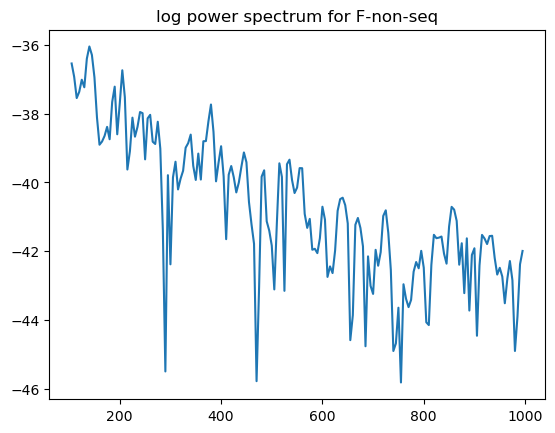

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


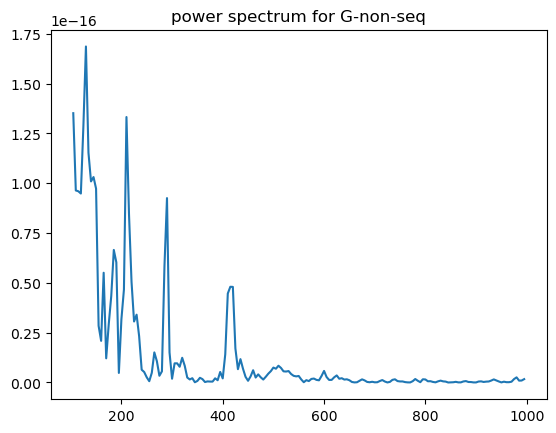

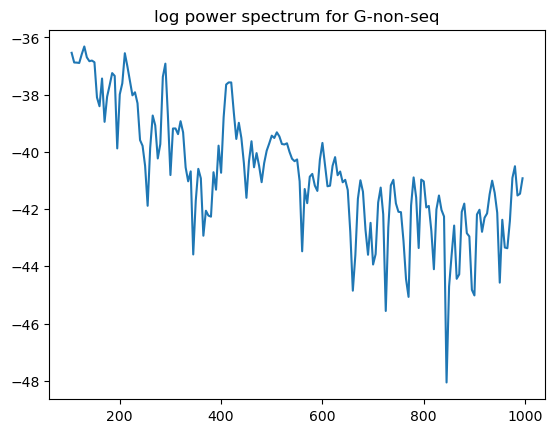

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-14/sub-14_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8656 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


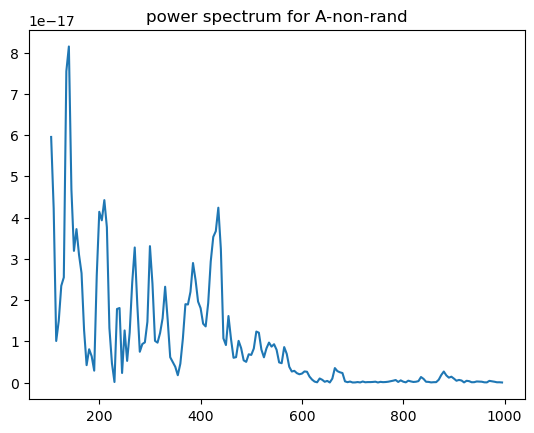

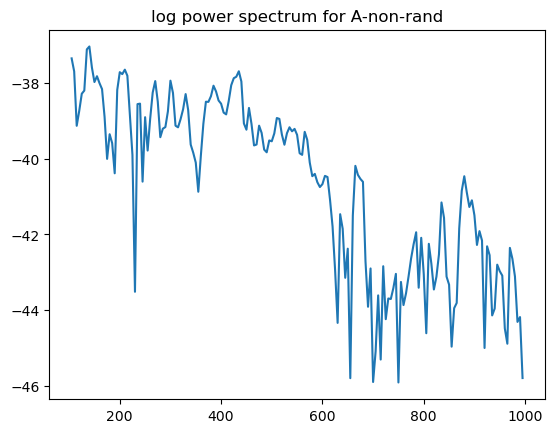

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


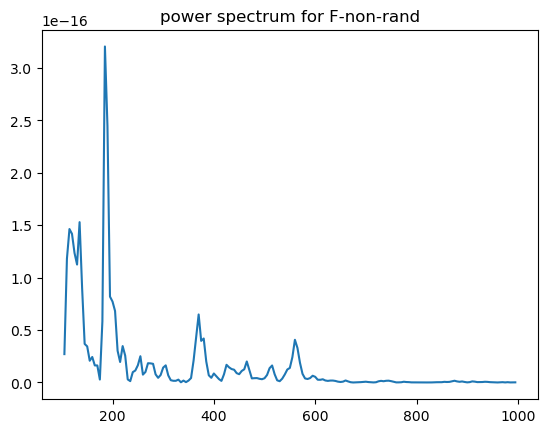

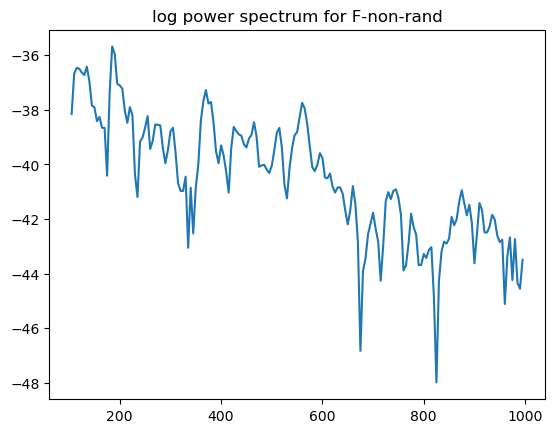

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


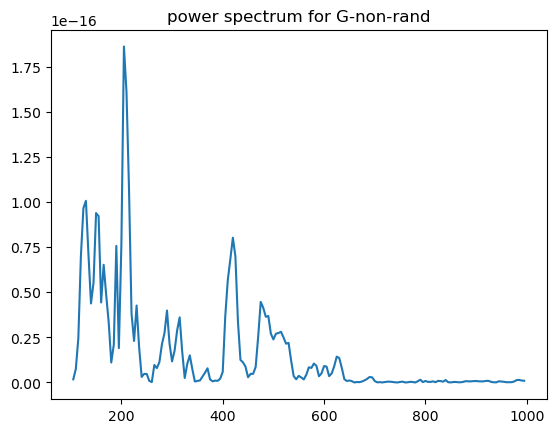

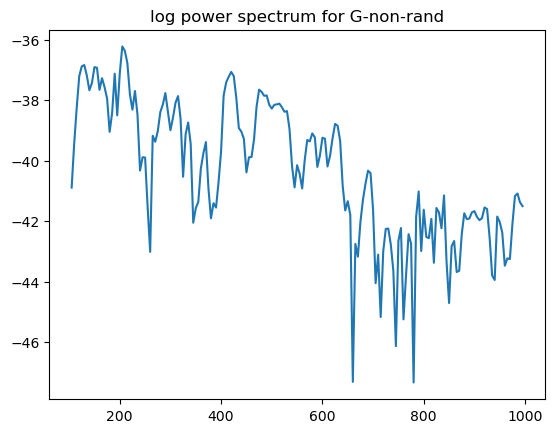

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


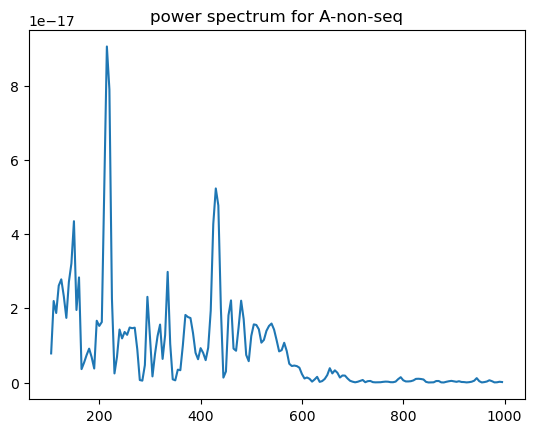

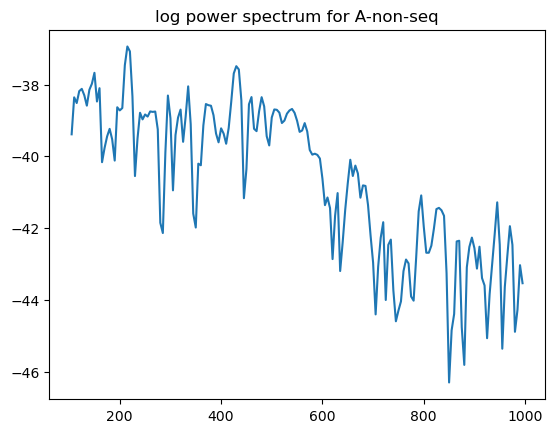

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


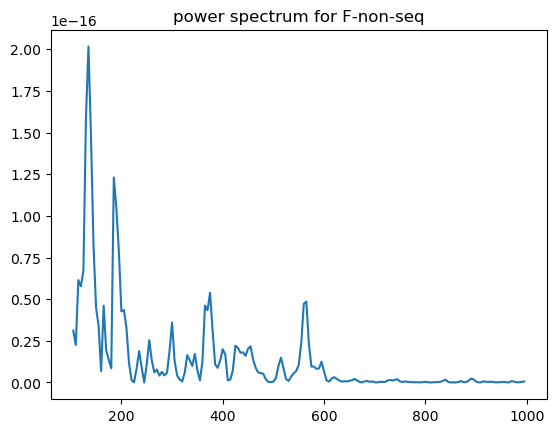

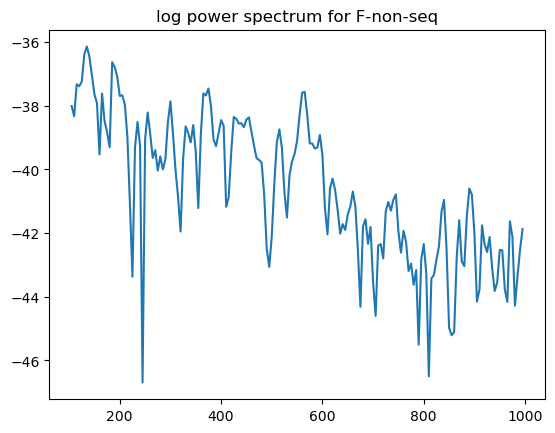

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


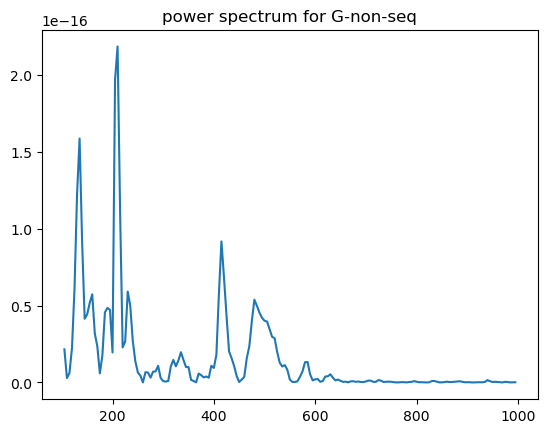

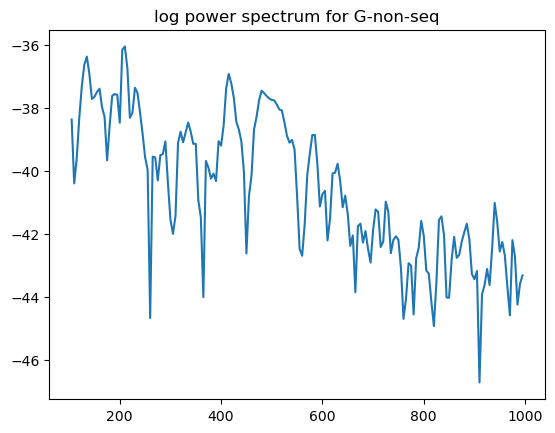

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-15/sub-15_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8546 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


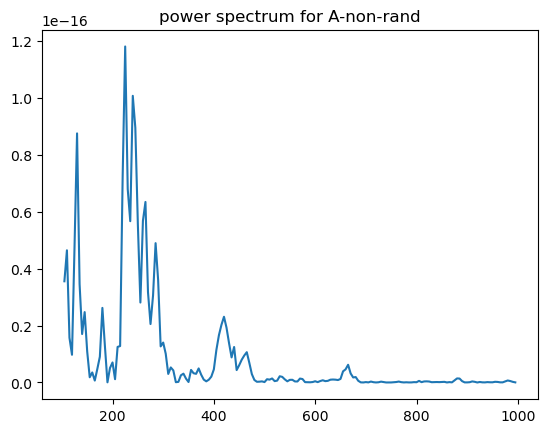

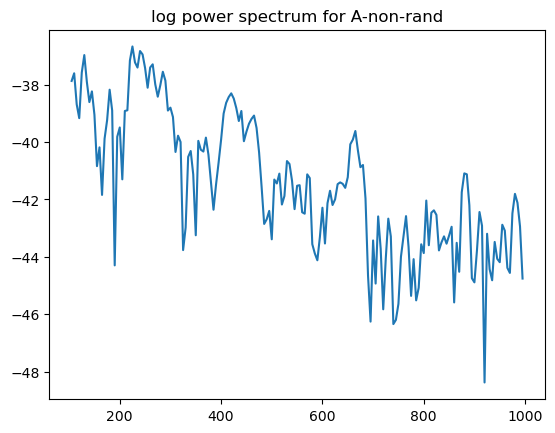

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


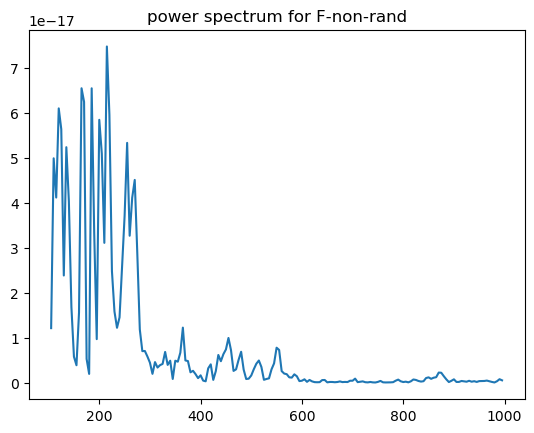

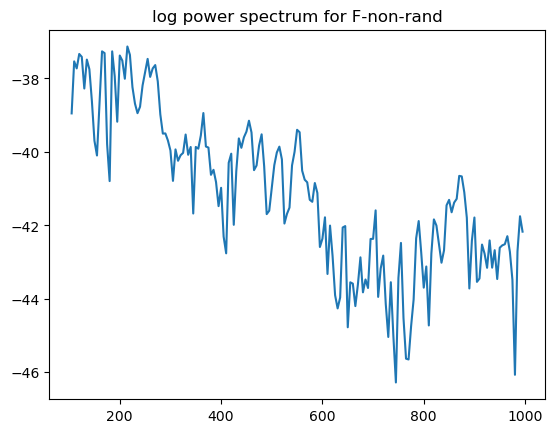

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


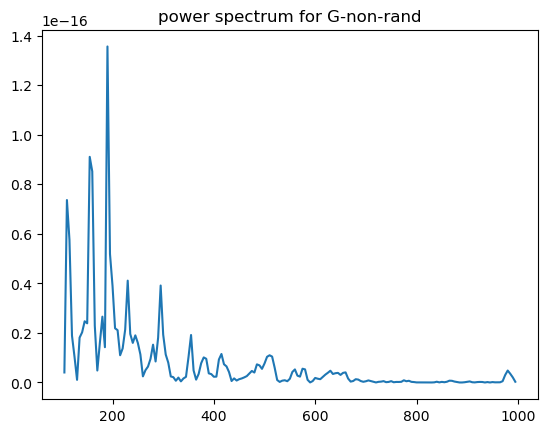

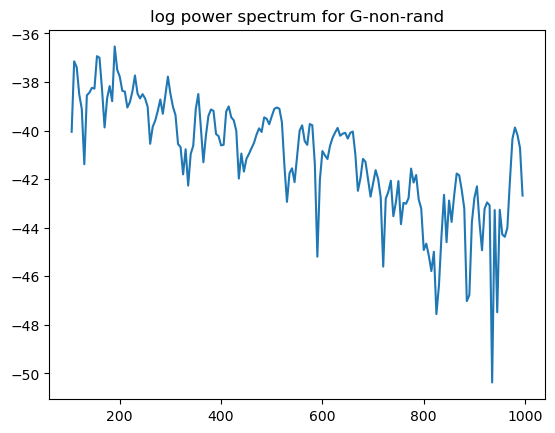

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


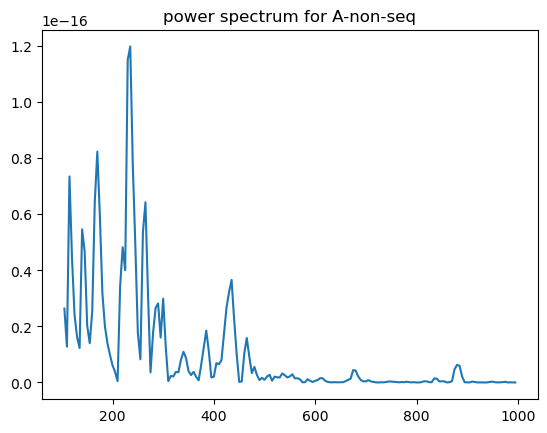

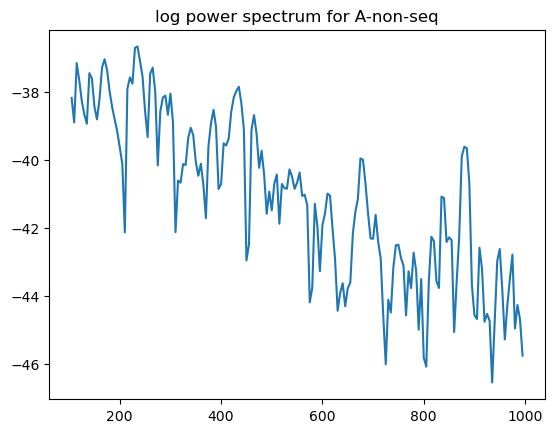

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


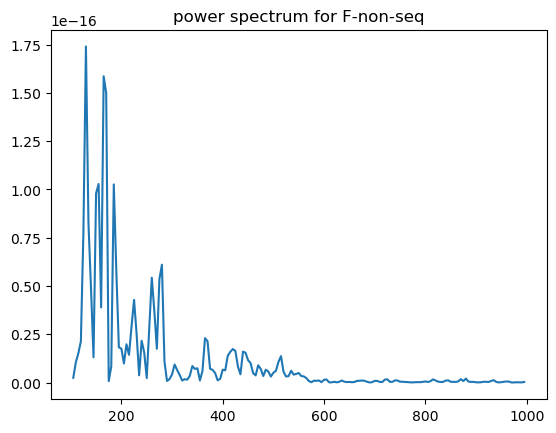

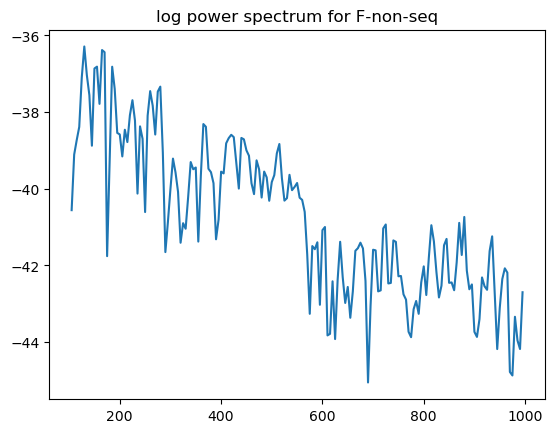

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


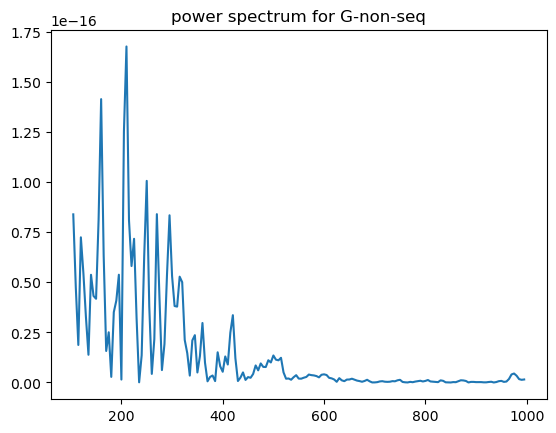

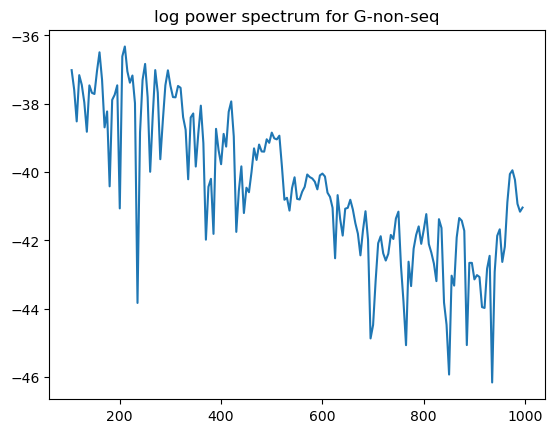

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-16/sub-16_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8417 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


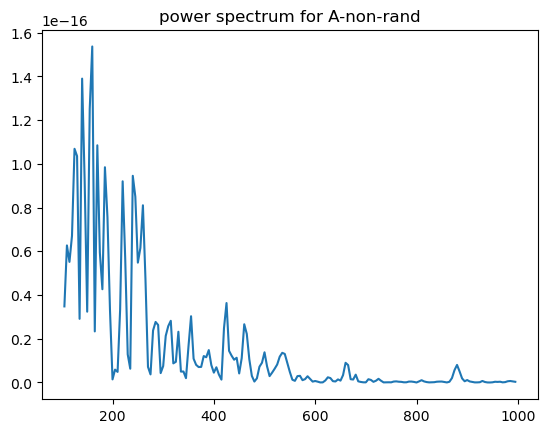

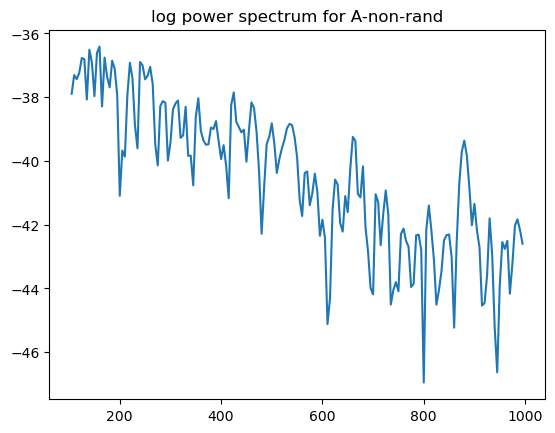

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


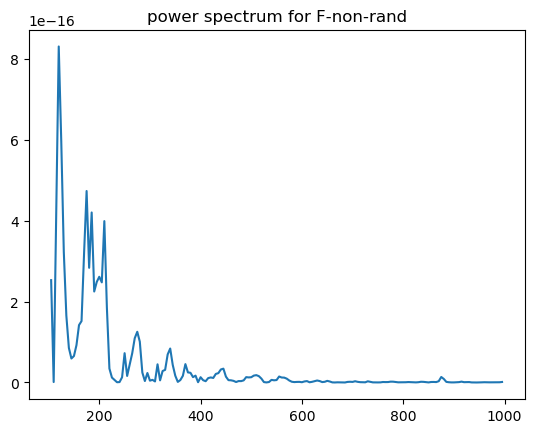

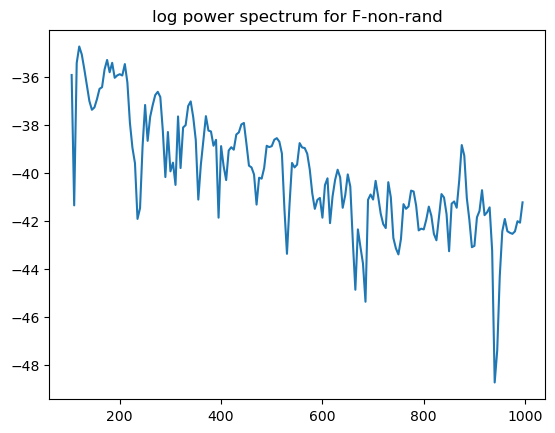

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


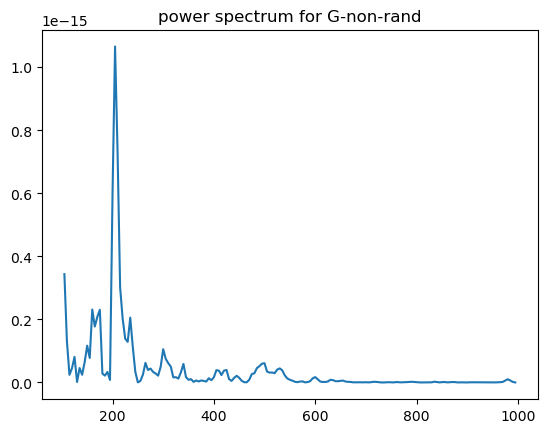

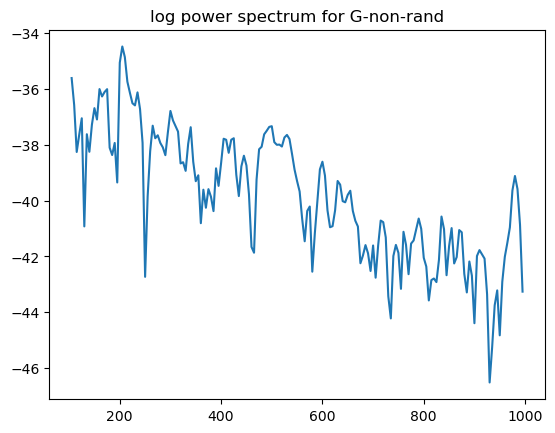

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


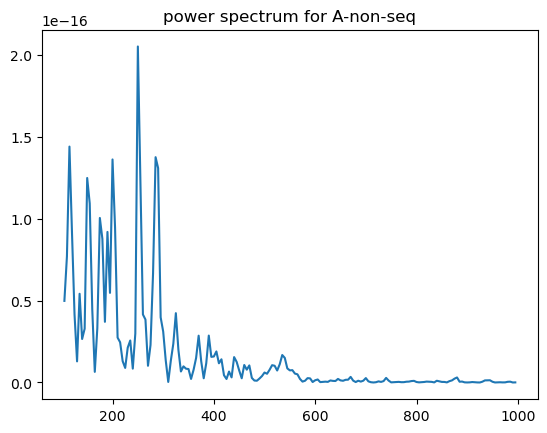

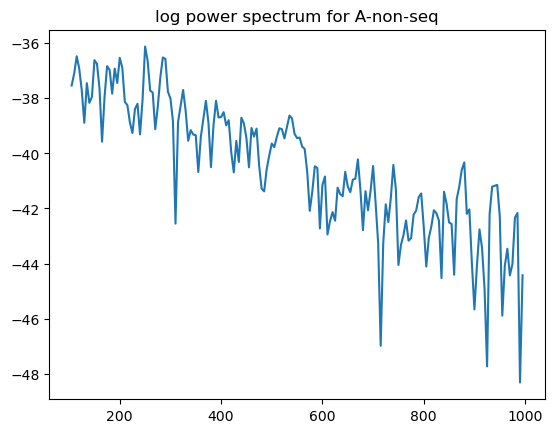

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


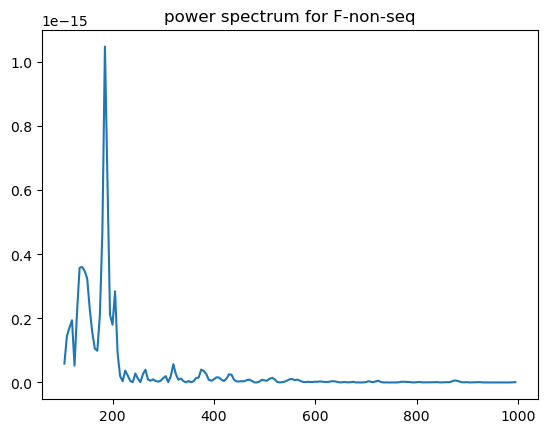

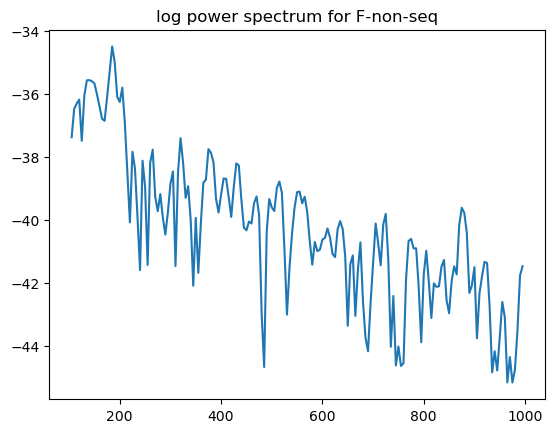

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


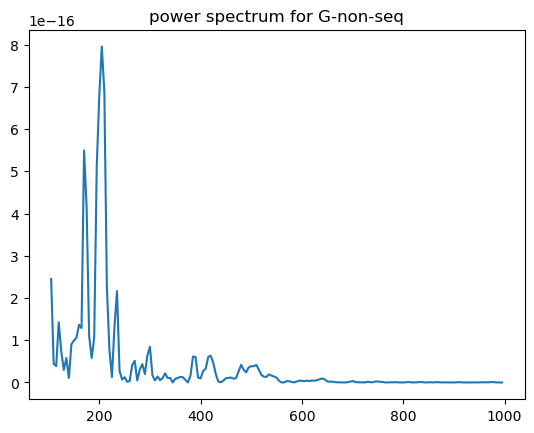

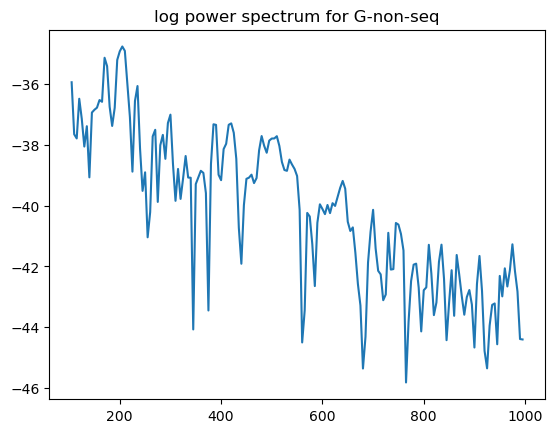

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-17/sub-17_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8713 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


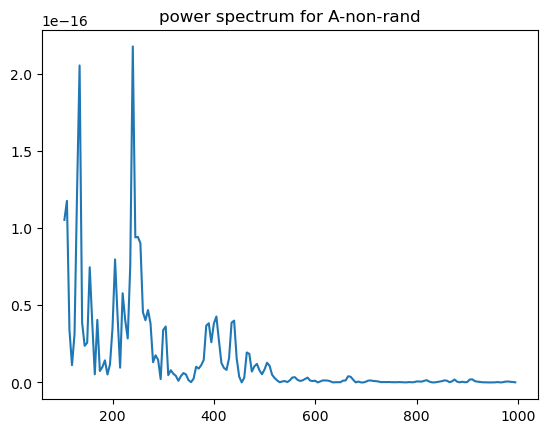

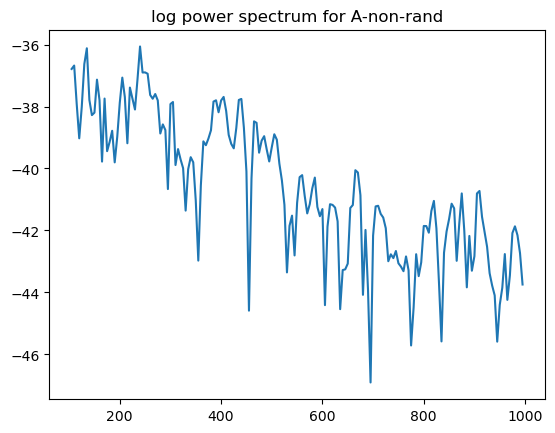

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


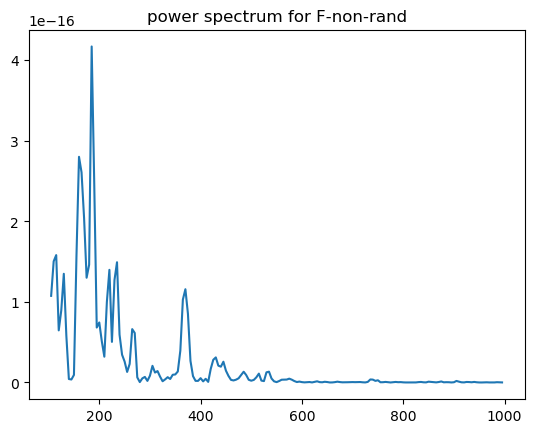

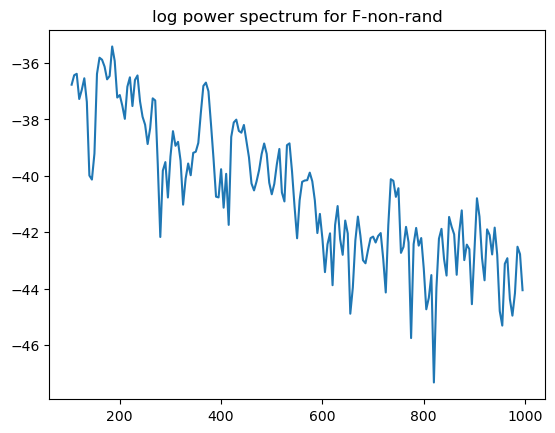

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


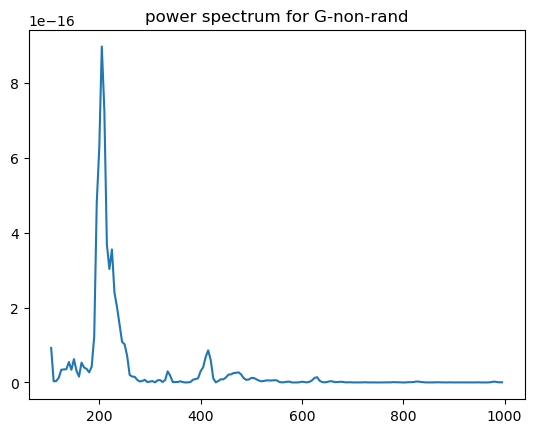

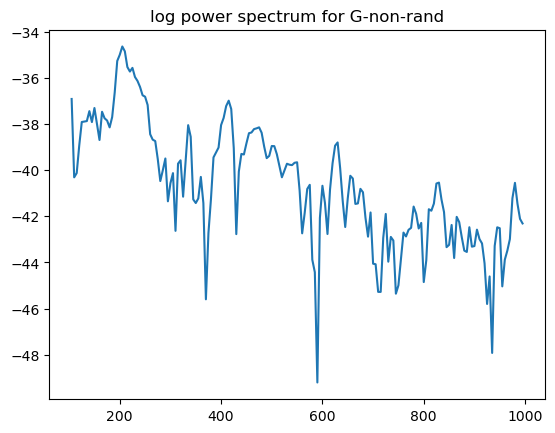

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


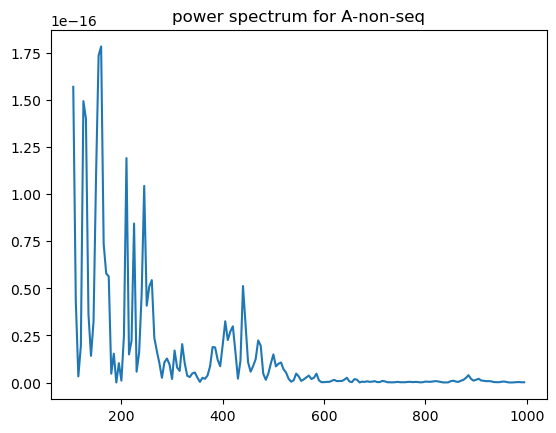

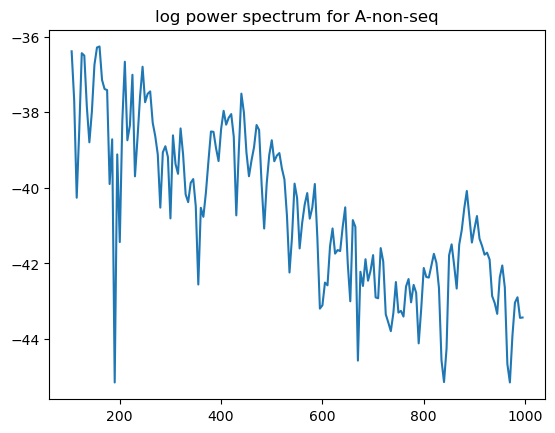

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


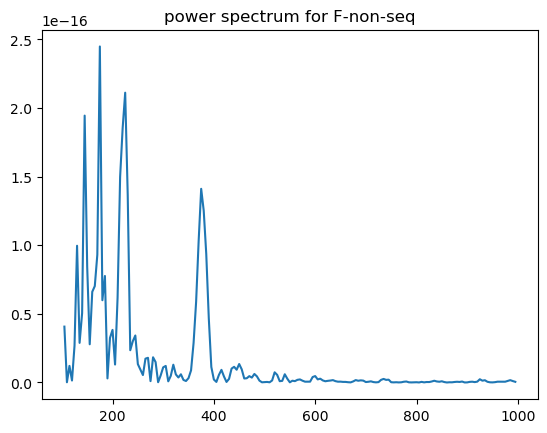

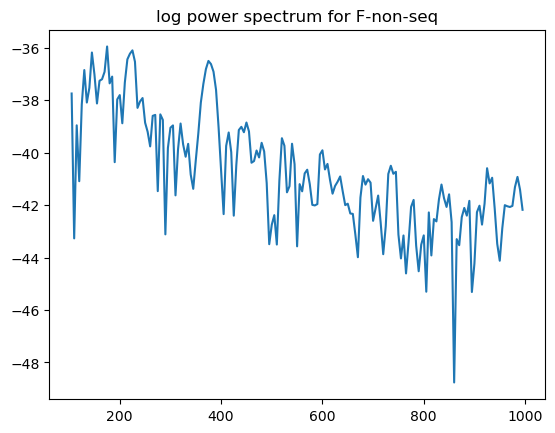

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


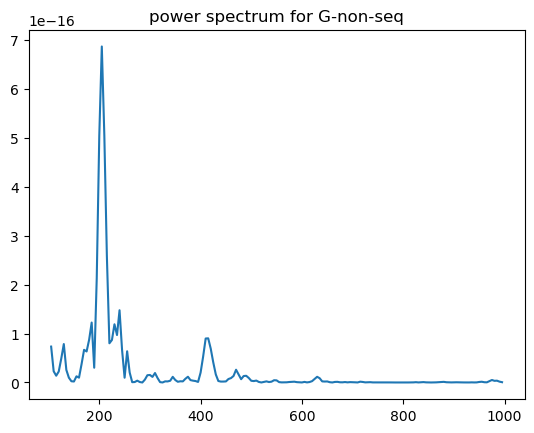

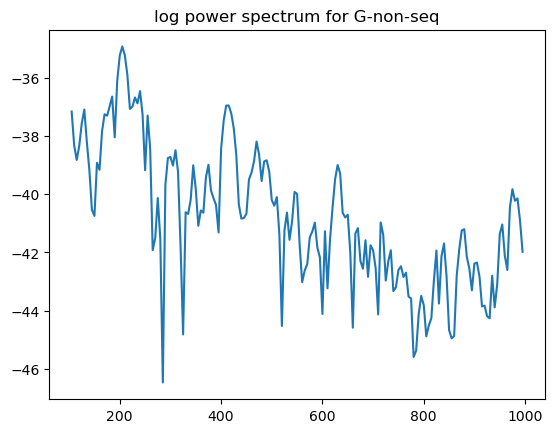

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-18/sub-18_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8358 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function.

/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


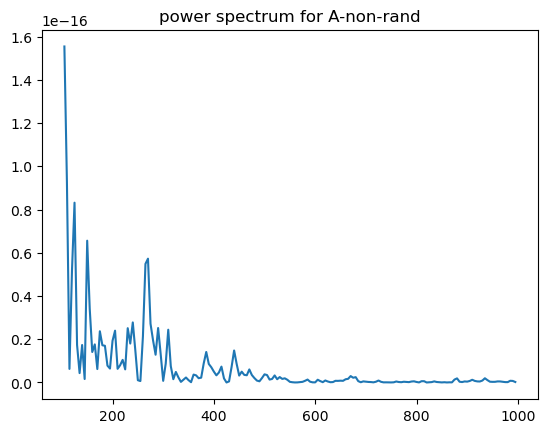

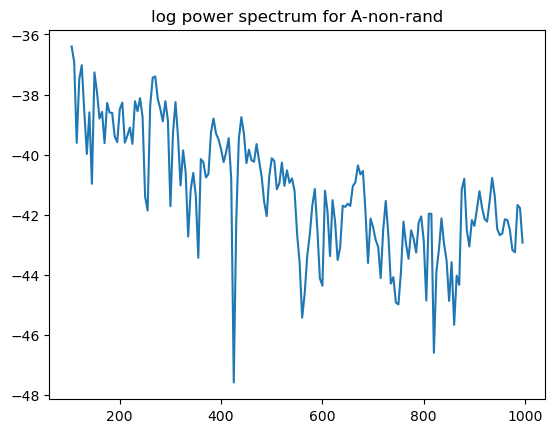

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


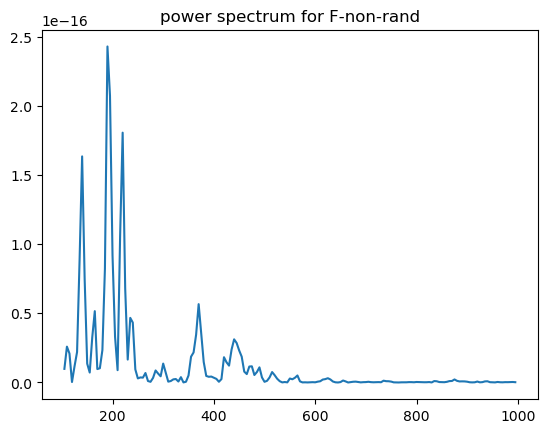

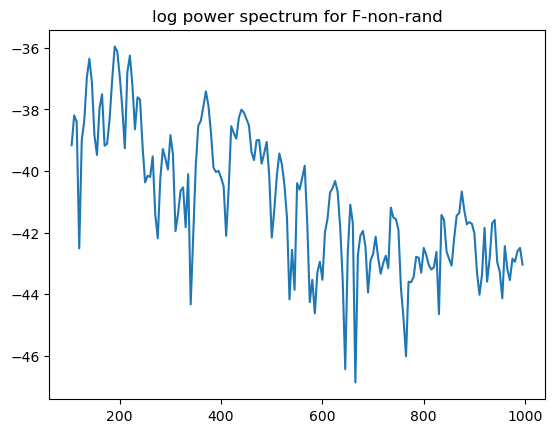

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


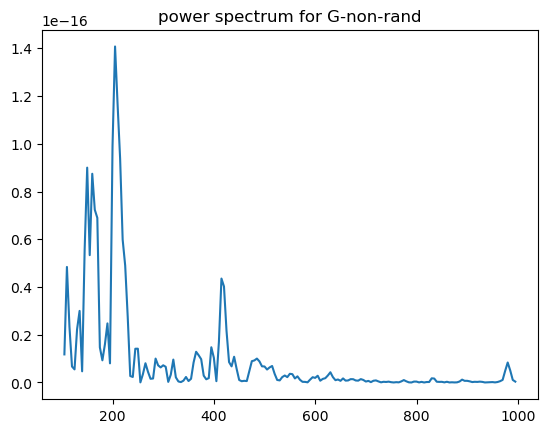

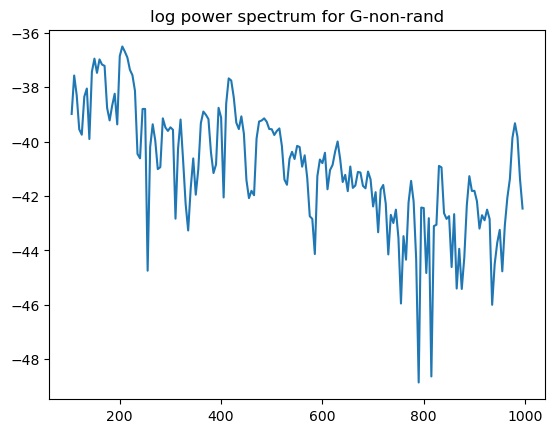

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


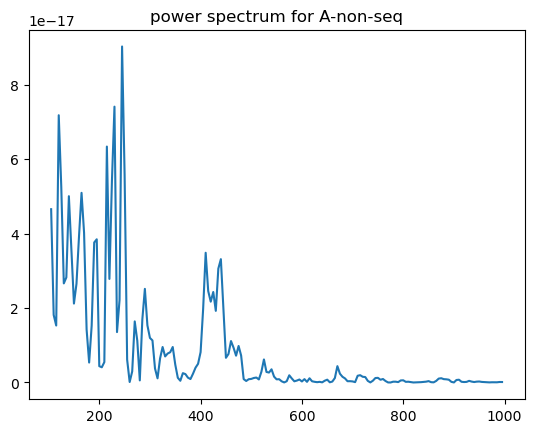

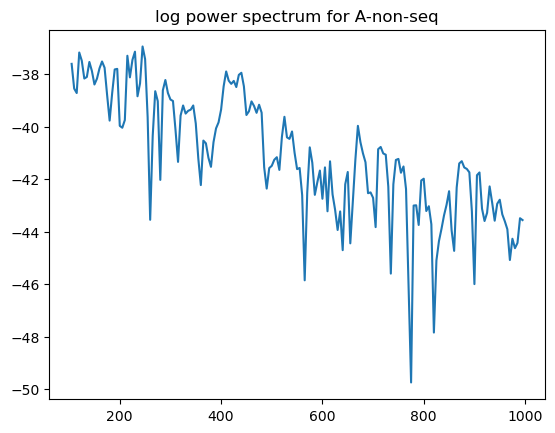

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


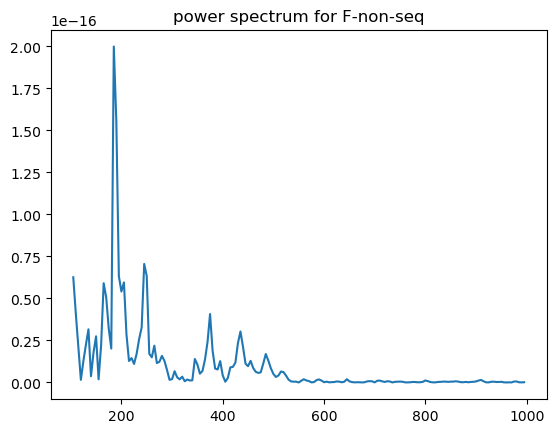

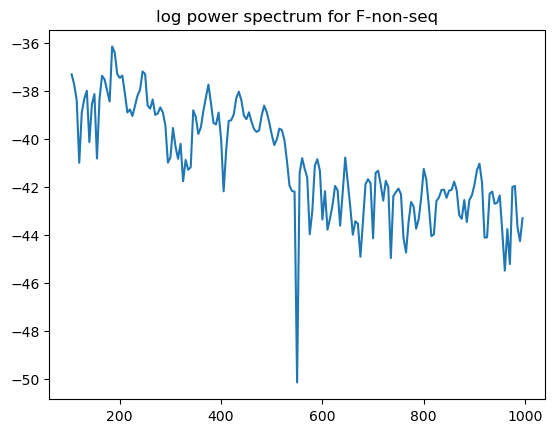

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_7236/1993573975.py:34: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.evoked.EvokedArray'>.tmax (0.1 s)
  cev = ev.copy().crop(.0, stim_dur)


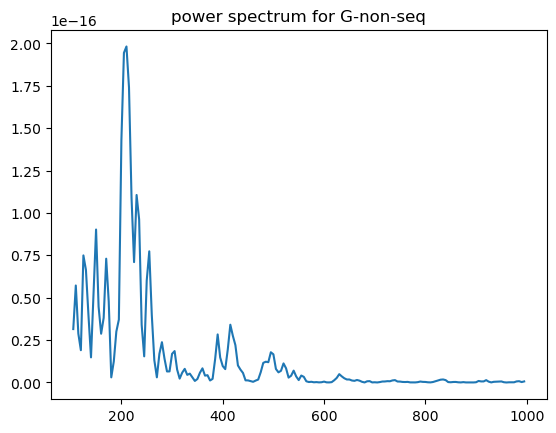

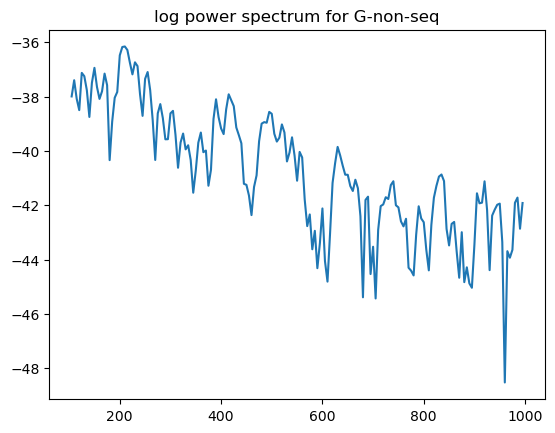

<Figure size 640x480 with 0 Axes>

In [95]:
# Constants
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess')
subs.sort(key = int)
noninverted_conditions = [
    'A-non-rand',
    'F-non-rand',
    'G-non-rand',
    'A-non-seq',
    'F-non-seq',
    'G-non-seq'
]
inverted_conditions = [
    'A-inv-rand',
    'F-inv-rand',
    'G-inv-rand',
    'A-inv-seq',
    'F-inv-seq',
    'G-inv-seq'
]


print(subs)
spectrums = []
for sub in subs:
        
    # Read epochs object
    fp = layout.get(return_type = 'filename', scope = 'preprocess', subject = sub)[0]
    epochs = mne.read_epochs(fp)
    
    # Get evoked potentials
    evokeds = {c:epochs[c].average() for c in conditions}

    conditions = list(epochs.event_id.keys())

    # Iterate over conditions
    for noninverted_condition, inverted_condition in zip(noninverted_conditions, inverted_conditions):
        
        noninverted_evoked = epochs[noninverted_condition].average()
        inverted_evoked = epochs[inverted_condition].average()
        press = balanced_average([inverted_evoked, noninverted_evoked])
        
        # Compute psd
        freqs, psd = get_power_spectrum(press)
        freq_range = np.logical_and(freqs > 100, freqs < 1000)
        
        # Append to df
        df = pd.DataFrame(
            {'subject': sub,
             'stimulus': noninverted_condition,
             'frequency': freqs[20:90],
             'power': psd[20:90]
            }
        )
        spectrums.append(df)
        
        # Plot
        plt.plot(freqs[freq_range], psd[freq_range])
        plt.title(f'power spectrum for {noninverted_condition}')
        plt.show()
        plt.savefig(f'../figs/psd_{noninverted_condition}.png')
        
        plt.plot(freqs[freq_range], np.log(psd)[freq_range])
        plt.title(f'log power spectrum for {noninverted_condition}')
        plt.show()
        plt.savefig(f'../figs/logpsd_{noninverted_condition}.png')
#         break
#     break
    
# Create dataframe and save
spectrums = pd.concat(spectrums, ignore_index = True)
spectrums.to_csv('spectrums.csv', sep = '\t', index = False)


#### Compute power in dB

In [69]:
# Constants
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess')
subs.sort(key = int)
spectrums = []
conditions = ['A-non-rand', 
              'F-non-rand',
              'G-non-rand',
              'A-inv-rand',
              'F-inv-rand',
              'G-inv-rand',
              'A-non-seq',
              'F-non-seq',
              'G-non-seq',
              'A-inv-seq',
              'F-inv-seq',
              'G-inv-seq',
              'noise', 
              'noise']

print(subs)

for sub in subs:
        
    # Read epochs object
    fp = layout.get(return_type = 'filename', scope = 'preprocess', subject = sub)[0]
    epochs = mne.read_epochs(fp)
    
    # Get evoked potentials
    evokeds = {c:epochs[c].average() for c in conditions}

    conditions = list(epochs.event_id.keys())

    # Iterate over conditions
    for condition in conditions:
        
        # Compute power in dB
        freqs, power = compute_power_dB(evokeds[condition])
        df = pd.DataFrame(
            {'subject': sub,
             'stimulus': condition,
             'frequency': freqs,
             'power': power
            }
        )
        spectrums.append(df)
    
# Create dataframe and save
spectrums = pd.concat(spectrums, ignore_index = True)
spectrums.to_csv('spectrumsdB.csv', sep = '\t', index = False)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-2/sub-2_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8789 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy f

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using

        0 CTF compensation matrices available
Not setting metadata
8795 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. Ne

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-14/sub-14_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8781 matching events found
No baseline correction applied
0 projection items act

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

#### Compute power in mV

In [70]:
spectrums = []
fs = 25000

for sub in subs:
        
    # Read epochs object
    fp = layout.get(return_type = 'filename', scope = 'preprocess', subject = sub)[0]
    epochs = mne.read_epochs(fp)
    
    # Get evoked potentials
    evokeds = {c:epochs[c].average() for c in conditions}

    conditions = list(epochs.event_id.keys())

    # Iterate over conditions
    for condition in conditions:
        
        # Compute power in dB
        freqs, power = compute_power_fft(evokeds[condition], fs)
        df = pd.DataFrame(
            {'subject': sub,
             'stimulus': condition,
             'frequency': freqs,
             'power': ps
            }
        )
        spectrums.append(df)
    
# Create dataframe and save
spectrums = pd.concat(spectrums, ignore_index = True)
spectrums.to_csv('spectrumsmV.csv', sep = '\t', index = False)

Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-2/sub-2_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8789 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-9/sub-9_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     100.00 ms
        0 CTF compensation matrices available
Not setting metadata
8791 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. N

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reading /project2/hcn1/reis-thesis-reanalysis/analysis/../data/bids/derivatives/preprocess/sub-15/sub-15_task-expectationsABR_desc-clean_epo.fif.gz ...
Isotrak not found
    Found the data of interest

### FFR

In [ ]:
spectrumsdB = pd.read_csv('spectrumsdB.csv', sep = '\t')

Text(0.5, 0, 'Frequency (Hz)')

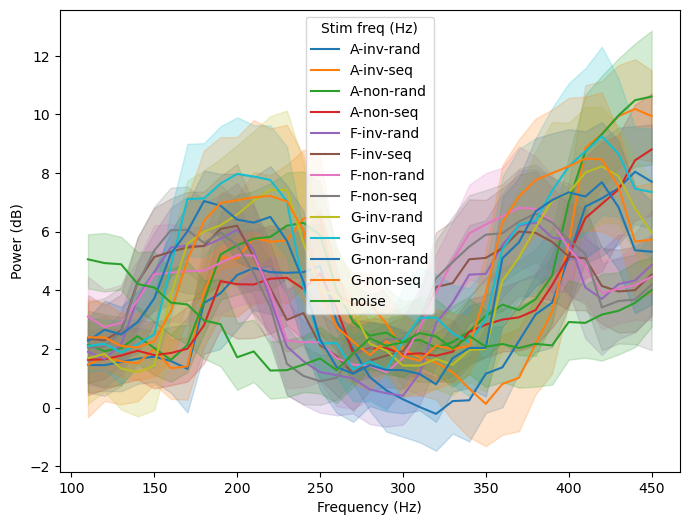

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrumsdB, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
# graph.axvline(50, linestyle = 'dashed', color = 'blue')
# graph.axvline(100, linestyle = 'dashed', color = 'orange')
# graph.axvline(150, linestyle = 'dashed', color = 'green')
# graph.axvline(200, linestyle = 'dashed', color = 'red')
# graph.axvline(250, linestyle = 'dashed', color = 'purple')
graph.legend(title = 'Stim freq (Hz)')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")
# graph.set_xlim(0, 350)

In [75]:
spectrumsmV = pd.read_csv('spectrumsmV.csv', sep = '\t')

Text(0.5, 0, 'Frequency (Hz)')

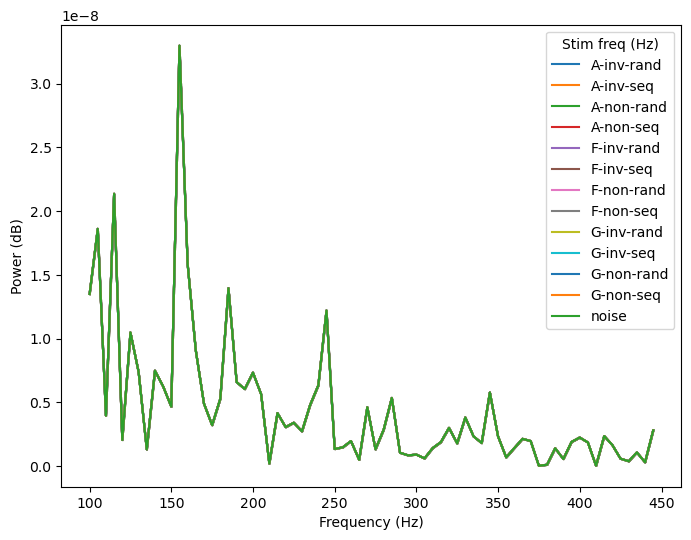

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrumsmV, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
graph.legend(title = 'Stim freq (Hz)')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")

In [77]:
spectrumsmV

subject    stimulus   frequency         power
0            2  A-inv-rand   99.980004  1.349283e-08
1            2  A-inv-rand  104.979004  1.860148e-08
2            2  A-inv-rand  109.978004  3.951252e-09
3            2  A-inv-rand  114.977005  2.135027e-08
4            2  A-inv-rand  119.976005  2.048037e-09
...        ...         ...         ...           ...
14555       18       noise  424.915017  5.792766e-10
14556       18       noise  429.914017  3.776097e-10
14557       18       noise  434.913017  1.071543e-09
14558       18       noise  439.912018  2.977136e-10
14559       18       noise  444.911018  2.802101e-09

[14560 rows x 4 columns]